In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import SpectralClustering
from sklearn.cluster import Birch
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.stats import spearmanr, kruskal



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print("\n" + "="*70)
print("SUPERVISED PROXY CLASSIFICATION")
print("="*70)


SUPERVISED PROXY CLASSIFICATION


In [ ]:
!pip install shap
!pip install lime
from lime import lime_tabular

In [ ]:
!pip install ydata-profiling


In [ ]:
# 1. LOAD & INITIAL CLEANING (EDA-BASED FIX)

print("="*70)
print("STAGE 1: DATA LOADING & INITIAL CLEANING (EDA-BASED)")
print("="*70)

# Load data
df = pd.read_csv("Rakamin Bootcamp - Dataset - Talent Segmentation Dataset.csv")
print(f"\n Data loaded successfully")
print(f"  Shape: {df.shape}")

print(f"\nDataset Overview:")
print(f"  Rows: {df.shape[0]}")
print(f"  Columns: {df.shape[1]}")
print(f"\n  Columns: {list(df.columns)}")

# Check missing values (raw)
print(f"\n Missing Values (Before Cleaning):")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
print(pd.DataFrame({
    'Missing': missing,
    'Percentage (%)': missing_pct
})[missing > 0])



STAGE 1: DATA LOADING & INITIAL CLEANING (EDA-BASED)

 Data loaded successfully
  Shape: (1000, 11)

Dataset Overview:
  Rows: 1000
  Columns: 11

  Columns: ['EmployeeID', 'Age', 'Department', 'Gender', 'Education', 'YearsAtCompany', 'PerformanceScore', 'MonthlyIncome', 'JobSatisfaction', 'TrainingHours', 'CompetencyScore']

 Missing Values (Before Cleaning):
                  Missing  Percentage (%)
EmployeeID             50             5.0
Age                    50             5.0
Department             50             5.0
Gender                 50             5.0
Education              50             5.0
YearsAtCompany         50             5.0
PerformanceScore       50             5.0
MonthlyIncome          50             5.0
JobSatisfaction        50             5.0
TrainingHours          50             5.0
CompetencyScore        50             5.0


EDA

In [ ]:

# EDA 2: NUMERICAL SUMMARY

print("\n" + "="*70)
print("EDA 2: NUMERICAL SUMMARY")
print("="*70)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
display(df[numerical_cols].describe().T)



EDA 2: NUMERICAL SUMMARY


,count,mean,std,min,25%,50%,75%,max
EmployeeID,950.0,504.495789,288.837223,1.0,253.25,507.5,753.75,1000.0
Age,950.0,40.591579,13.484782,-2.0,30.00,41.0,50.00,200.0
YearsAtCompany,950.0,12.194737,7.335909,0.0,6.00,12.0,19.00,24.0
PerformanceScore,950.0,3.000000,1.086365,1.0,2.00,3.0,4.00,5.0
MonthlyIncome,950.0,13685.104211,36400.068162,-1000.0,6189.25,11887.0,18022.75,999999.0
JobSatisfaction,950.0,3.008421,1.103655,1.0,2.00,3.0,4.00,5.0
TrainingHours,950.0,50.736842,45.809522,-50.0,24.00,48.0,75.00,1000.0
CompetencyScore,950.0,3.005263,1.124014,-1.0,2.00,3.0,4.00,10.0


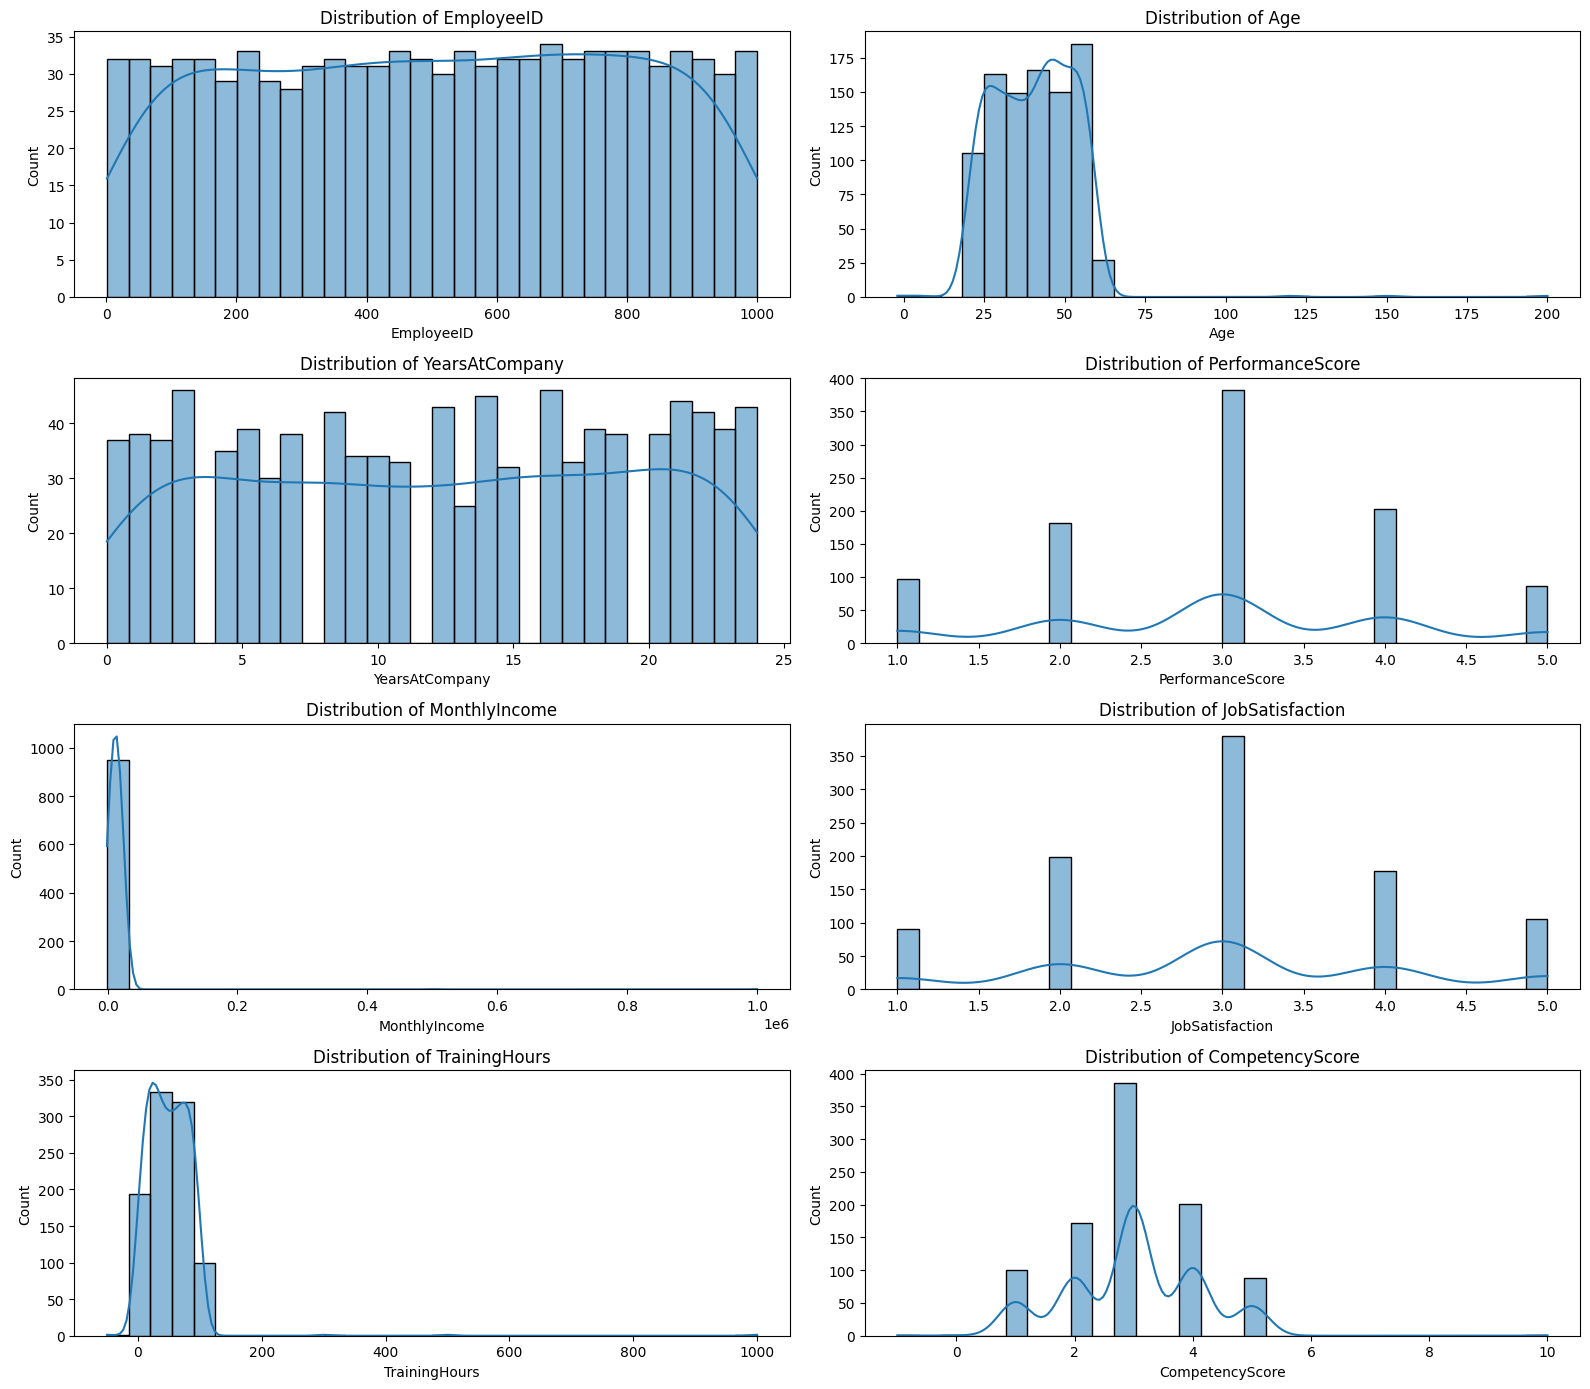

In [ ]:

# EDA 3: NUMERICAL DISTRIBUTION

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 14))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


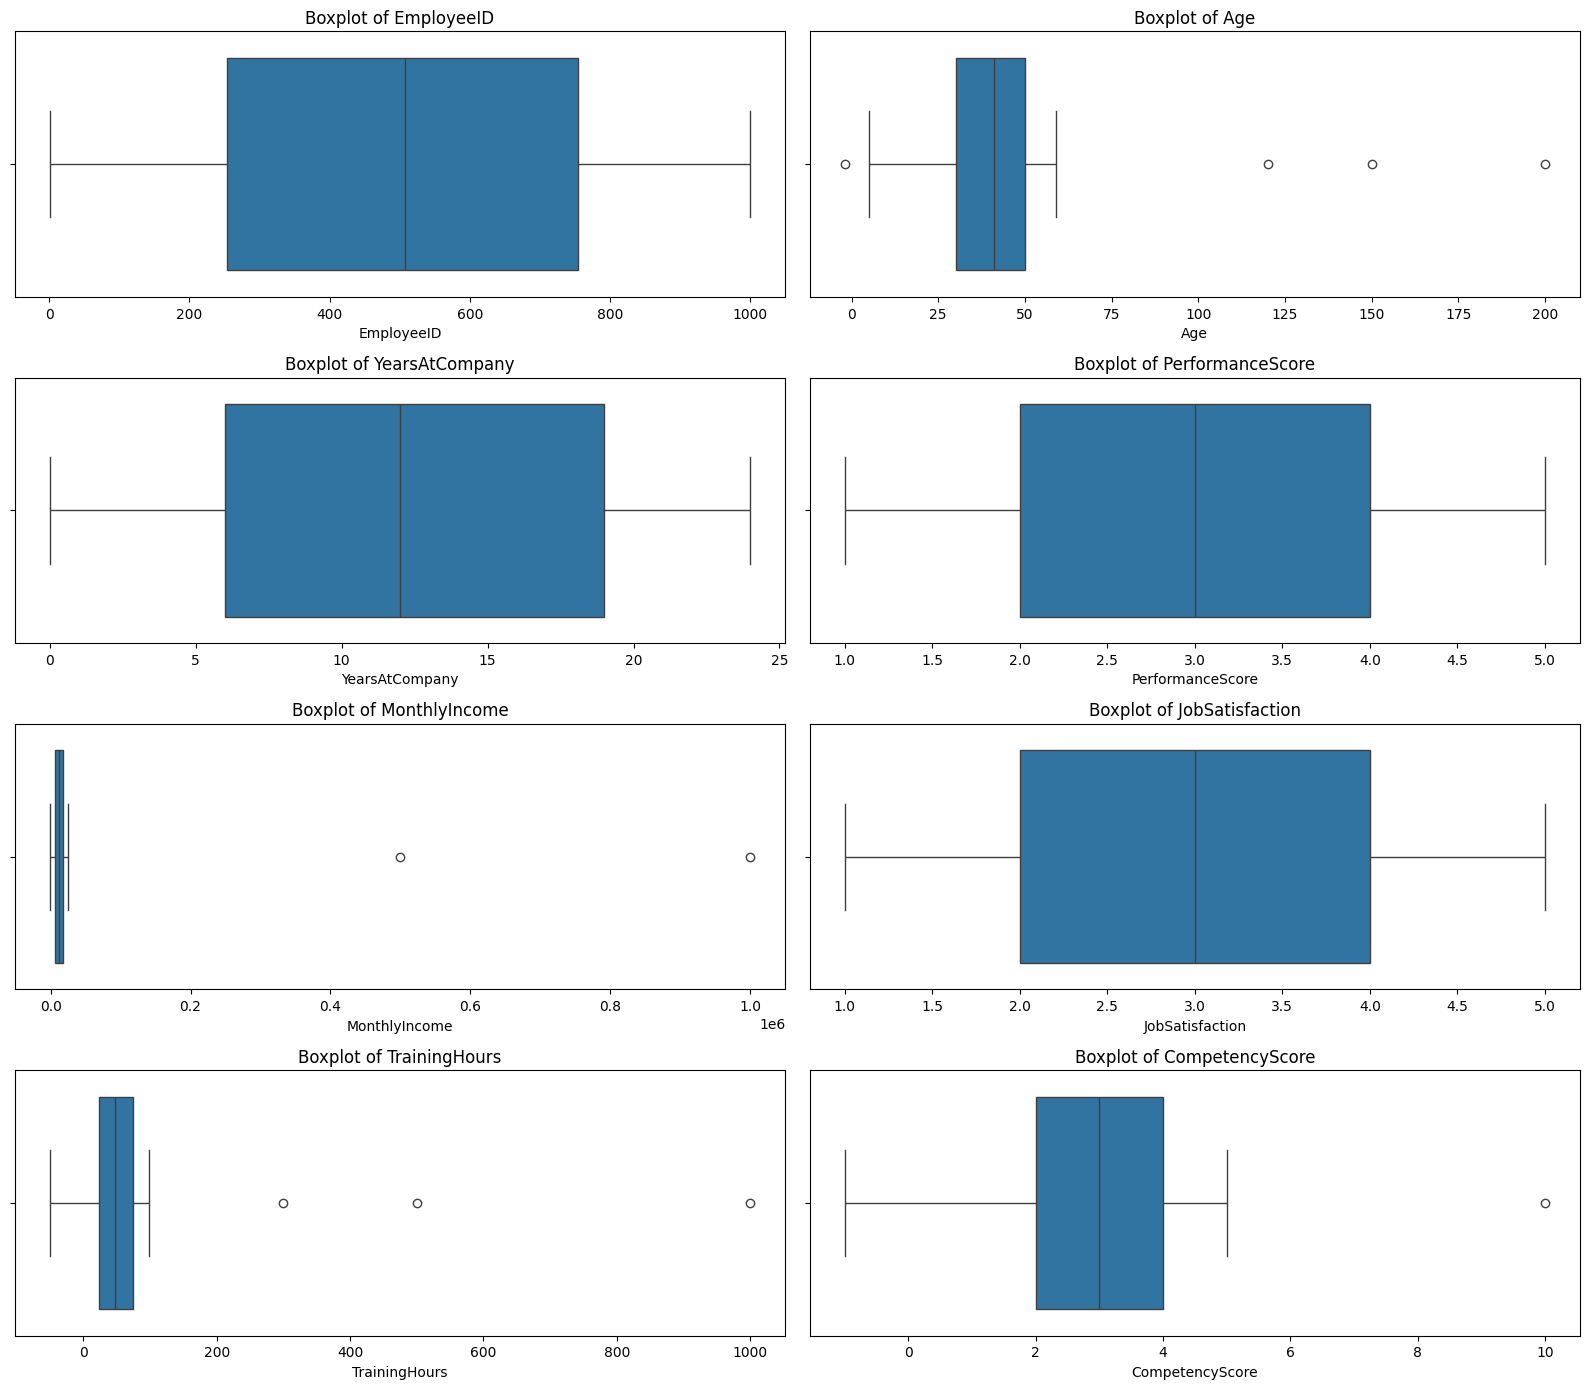

In [ ]:

# EDA 4: OUTLIER CHECK (BOXPLOT)

plt.figure(figsize=(16, 14))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [ ]:
df_clean = df.copy()


In [ ]:
print("AGE SUMMARY")
print(df_clean['Age'].describe())

# Deteksi umur tidak logis
invalid_age_under = df_clean[df_clean['Age'] < 18]
invalid_age_over = df_clean[df_clean['Age'] > 65]

print(f"\nAge < 18: {len(invalid_age_under)} rows")
print(f"Age > 65: {len(invalid_age_over)} rows")


AGE SUMMARY
count    950.000000
mean      40.591579
std       13.484782
min       -2.000000
25%       30.000000
50%       41.000000
75%       50.000000
max      200.000000
Name: Age, dtype: float64

Age < 18: 2 rows
Age > 65: 3 rows


In [ ]:
# DELETE age < 18
df_clean = df_clean[df_clean['Age'] >= 18]

# Age > 65 → NaN (akan di-median)
df_clean.loc[df_clean['Age'] > 65, 'Age'] = np.nan


In [ ]:
print("\nMONTHLY INCOME SUMMARY")
print(df_clean['MonthlyIncome'].describe())

# Lihat kasus income ekstrem
extreme_income = df_clean[df_clean['MonthlyIncome'] > 100000]
extreme_income[['Age', 'YearsAtCompany', 'MonthlyIncome']].head()



MONTHLY INCOME SUMMARY
count       899.000000
mean      13759.630701
std       37380.508167
min       -1000.000000
25%        6249.000000
50%       11823.000000
75%       18007.500000
max      999999.000000
Name: MonthlyIncome, dtype: float64


,Age,YearsAtCompany,MonthlyIncome
708,24.0,15.0,999999.0
835,58.0,10.0,500000.0


In [ ]:
# Ambil data Age < 18
underage_df = df[df['Age'] < 18].copy()

print(f"Jumlah data Age < 18: {len(underage_df)}")
underage_df.describe()


Jumlah data Age < 18: 2


,EmployeeID,Age,YearsAtCompany,PerformanceScore,MonthlyIncome,JobSatisfaction,TrainingHours,CompetencyScore
count,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.00000
mean,483.000000,1.500000,17.000000,3.0,10909.500000,4.000000,88.500000,2.50000
std,429.920923,4.949747,9.899495,0.0,12667.817985,1.414214,3.535534,2.12132
min,179.000000,-2.000000,10.000000,3.0,1952.000000,3.000000,86.000000,1.00000
25%,331.000000,-0.250000,13.500000,3.0,6430.750000,3.500000,87.250000,1.75000
50%,483.000000,1.500000,17.000000,3.0,10909.500000,4.000000,88.500000,2.50000
75%,635.000000,3.250000,20.500000,3.0,15388.250000,4.500000,89.750000,3.25000
max,787.000000,5.000000,24.000000,3.0,19867.000000,5.000000,91.000000,4.00000


### Ringkasan data:
- Jumlah observasi: 2 baris
- Rata-rata umur: 1,5 tahun
- Rentang umur: -2 sampai 5 tahun
- Rata-rata YearsAtCompany: 17 tahun
- Rentang YearsAtCompany: 10 – 24 tahun

In [ ]:
df_eda = df.copy()

df_eda['StartWorkingAge'] = df_eda['Age'] - df_eda['YearsAtCompany']

df_eda[['Age', 'YearsAtCompany', 'StartWorkingAge']].head()


,Age,YearsAtCompany,StartWorkingAge
0,59.0,11.0,48.0
1,49.0,11.0,38.0
2,35.0,19.0,16.0
3,28.0,5.0,23.0
4,41.0,22.0,19.0


In [ ]:
print("StartWorkingAge Summary")
df_eda['StartWorkingAge'].describe()


StartWorkingAge Summary


,StartWorkingAge
count,902.000000
mean,28.233925
std,15.150215
min,-26.000000
25%,18.000000
50%,29.000000
75%,38.000000
max,196.000000


In [ ]:
df_logic = df.copy()
df_logic['StartWorkingAge'] = df_logic['Age'] - df_logic['YearsAtCompany']

# DELETE: relasi tidak mungkin
delete_mask = (
    (df_logic['StartWorkingAge'] < 0) |
    (df_logic['StartWorkingAge'] > 65)
)
df_logic = df_logic[~delete_mask].copy()

# MEDIAN: age typo tapi masih mungkin
soft_age_mask = (
    (df_logic['StartWorkingAge'] >= 0) &
    (df_logic['StartWorkingAge'] < 18)
)
df_logic.loc[soft_age_mask, 'Age'] = np.nan

# MEDIAN: income invalid / ekstrem
df_logic.loc[df_logic['MonthlyIncome'] <= 0, 'MonthlyIncome'] = np.nan
df_logic.loc[df_logic['MonthlyIncome'] > 100000, 'MonthlyIncome'] = np.nan


## Catatan Pembersihan Data (Umur & Gaji)
- Data tidak langsung dihapus berdasarkan satu nilai ekstrem.
- Baris data hanya dihapus jika hubungan antara umur dan masa kerja tidak masuk akal secara logika (misalnya mulai bekerja di usia negatif).
- Nilai gaji yang tidak valid atau terlalu ekstrem tidak digunakan untuk menghapus baris, tetapi diganti dengan median agar profil karyawan yang masih valid tetap dipertahankan.
- Pendekatan ini bertujuan meminimalkan kehilangan data sekaligus menjaga konsistensi logis untuk analisis clustering.

In [ ]:
# Ambil data dengan training tinggi
high_training = df.copy()
high_training = high_training[high_training['TrainingHours'] > 200]

print(f"Jumlah data TrainingHours > 200: {len(high_training)}")


Jumlah data TrainingHours > 200: 3


In [ ]:
cols = [
    'EmployeeID',
    'Age',
    'YearsAtCompany',
    'TrainingHours',
    'MonthlyIncome',
    'PerformanceScore',
    'CompetencyScore'
]

high_training[cols].sort_values('TrainingHours', ascending=False).head(10)


,EmployeeID,Age,YearsAtCompany,TrainingHours,MonthlyIncome,PerformanceScore,CompetencyScore
145,146.0,59.0,24.0,1000.0,12554.0,4.0,4.0
973,974.0,NaN,19.0,500.0,10350.0,3.0,4.0
56,57.0,46.0,15.0,300.0,NaN,5.0,2.0


In [ ]:
# TRAINING HOURS CLEANING (FINAL)


# Tandai TrainingHours yang terlalu tinggi (>= 300)
extreme_training_mask = df_clean['TrainingHours'] >= 300

print(f"Jumlah TrainingHours ≥ 300 (akan dimedian): {extreme_training_mask.sum()}")

# Set ke NaN terlebih dahulu
df_clean.loc[extreme_training_mask, 'TrainingHours'] = np.nan

# Imputasi dengan median
median_training = df_clean['TrainingHours'].median()
df_clean['TrainingHours'] = df_clean['TrainingHours'].fillna(median_training)

print(f"✓ TrainingHours ≥ 300 diganti median: {median_training}")


Jumlah TrainingHours ≥ 300 (akan dimedian): 2
✓ TrainingHours ≥ 300 diganti median: 49.0


In [ ]:
df_clean.loc[
    (df_clean['CompetencyScore'] < 1) | (df_clean['CompetencyScore'] > 5),
    'CompetencyScore'
] = np.nan

df_clean['CompetencyScore'] = df_clean['CompetencyScore'].fillna(
    df_clean['CompetencyScore'].median()
)


In [ ]:
df_clean.isnull().sum()


,0
EmployeeID,48
Age,3
Department,46
Gender,47
Education,49
YearsAtCompany,48
PerformanceScore,46
MonthlyIncome,49
JobSatisfaction,48
TrainingHours,0


In [ ]:
# ===============================
# FINAL STEP: IMPUTATION ONLY
# ===============================

numerical_cols = [
    'Age',
    'YearsAtCompany',
    'PerformanceScore',
    'MonthlyIncome',
    'JobSatisfaction',
    'TrainingHours',
    'CompetencyScore'
]

categorical_cols = [
    'Department',
    'Gender',
    'Education'
]

# Numerical → median
for col in numerical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Categorical → mode
for col in categorical_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("✓ Missing values berhasil diimputasi")

# Cek akhir
print("\n🔍 Missing Values (After Imputation):")
print(df_clean.isnull().sum())


✓ Missing values berhasil diimputasi

🔍 Missing Values (After Imputation):
EmployeeID          48
Age                  0
Department           0
Gender               0
Education            0
YearsAtCompany       0
PerformanceScore     0
MonthlyIncome        0
JobSatisfaction      0
TrainingHours        0
CompetencyScore      0
dtype: int64


In [ ]:
# ========================================
# STAGE 1: FEATURE ENGINEERING
# ========================================

print("\n" + "="*70)
print("STAGE 1: FEATURE ENGINEERING")
print("="*70)

df_fe = df_clean.copy()

# Business-driven features
df_fe['TrainingIntensity'] = df_fe['TrainingHours'] / (df_fe['YearsAtCompany'] + 1)
df_fe['PotentialGap'] = df_fe['PerformanceScore'] - df_fe['CompetencyScore']
df_fe['TrainingEfficiency'] = df_fe['PerformanceScore'] / (df_fe['TrainingIntensity'] + 1)
df_fe['PerformanceVelocity'] = df_fe['PerformanceScore'] / (df_fe['YearsAtCompany'] + 1)

print("✓ Added 4 engineered features")
print(f"\nFeature stats:\n{df_fe[['TrainingIntensity', 'PotentialGap', 'TrainingEfficiency', 'PerformanceVelocity']].describe()}")



STAGE 1: FEATURE ENGINEERING
✓ Added 4 engineered features

Feature stats:
       TrainingIntensity  PotentialGap  TrainingEfficiency  \
count         948.000000    948.000000          948.000000   
mean            7.373241     -0.009494            0.802246   
std            12.617611      1.511279            0.703722   
min            -0.400000     -4.000000            0.010101   
25%             1.921474     -1.000000            0.304416   
50%             3.800000      0.000000            0.600000   
75%             7.022727      1.000000            1.064266   
max            98.000000      4.000000            4.687500   

       PerformanceVelocity  
count           948.000000  
mean              0.441411  
std               0.637168  
min               0.040000  
25%               0.150000  
50%               0.230769  
75%               0.428571  
max               5.000000  


In [ ]:
# ========================================
# STAGE 2: FEATURE SELECTION (EXPLORATORY)
# ========================================

print("\n" + "="*70)
print("STAGE 2: FEATURE SELECTION (Statistical Testing - Exploratory)")
print("="*70)

target = 'PerformanceScore'
all_features = df_fe.columns.drop(target)

# Numerical features - Spearman correlation
num_results = []
for col in all_features:
    if pd.api.types.is_numeric_dtype(df_fe[col]):
        corr, pval = spearmanr(df_fe[col], df_fe[target])
        num_results.append({
            'Feature': col,
            'Type': 'Numerical',
            'SpearmanCorr': corr,
            'P_Value': pval,
            'Significant': pval < 0.05
        })

# Categorical features - Kruskal-Wallis
cat_results = []
for col in all_features:
    if df_fe[col].dtype == 'object':
        groups = [df_fe[df_fe[col] == cat][target] for cat in df_fe[col].dropna().unique()]
        stat, pval = kruskal(*groups) if len(groups) > 1 else (0, 1.0)
        cat_results.append({
            'Feature': col,
            'Type': 'Categorical',
            'P_Value': pval,
            'Significant': pval < 0.05
        })

feature_stats = pd.concat([
    pd.DataFrame(num_results),
    pd.DataFrame(cat_results)
], ignore_index=True).sort_values('P_Value')

print(f"\n✓ Statistical tests completed (for reference only)")
print(f"\nTop significant features:\n{feature_stats.head(10)}")
print("\n⚠️ Note: All features will be used in clustering (as requested)")


STAGE 2: FEATURE SELECTION (Statistical Testing - Exploratory)

✓ Statistical tests completed (for reference only)

Top significant features:
                Feature         Type  SpearmanCorr        P_Value  Significant
8          PotentialGap    Numerical      0.710801  1.025954e-146         True
10  PerformanceVelocity    Numerical      0.480027   8.462654e-56         True
9    TrainingEfficiency    Numerical      0.453320   3.164640e-49         True
5         TrainingHours    Numerical     -0.060768   6.144467e-02        False
7     TrainingIntensity    Numerical     -0.039811   2.207130e-01        False
11           Department  Categorical           NaN   2.459256e-01        False
12               Gender  Categorical           NaN   3.171432e-01        False
4       JobSatisfaction    Numerical      0.023338   4.729225e-01        False
3         MonthlyIncome    Numerical      0.016707   6.074152e-01        False
13            Education  Categorical           NaN   6.514463e-01  

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

print("\n" + "="*70)
print("STAGE 3: DATA PREPROCESSING")
print("="*70)

# ------------------------------------------------------------
# Drop non-informative columns
# ------------------------------------------------------------
df_model = df_fe.drop(columns=['EmployeeID', 'Gender'], errors='ignore')

# ------------------------------------------------------------
# Ordinal encoding for Education
# ------------------------------------------------------------
education_map = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}

df_model['EducationLevel'] = df_model['Education'].map(education_map)
df_model['EducationLevel'] = df_model['EducationLevel'].fillna(
    df_model['EducationLevel'].median()
)
df_model = df_model.drop(columns=['Education'])

print("✓ Education encoded")

# ------------------------------------------------------------
# LOG TRANSFORMATION (SELECTIVE)
# ------------------------------------------------------------
log_features = ['MonthlyIncome', 'TrainingHours', 'YearsAtCompany']

for col in log_features:
    if col in df_model.columns:
        df_model[f'{col}_log'] = np.log1p(df_model[col])

print("✓ Log transformation applied")

# ------------------------------------------------------------
# Define features
# ------------------------------------------------------------
numerical_features = [
    'Age',
    'YearsAtCompany_log',
    'MonthlyIncome_log',
    'JobSatisfaction',
    'TrainingHours_log',
    'CompetencyScore',
    'TrainingIntensity',
    'PotentialGap',
    'TrainingEfficiency',
    'PerformanceVelocity',
    'EducationLevel'
]

categorical_features = ['Department']

# ------------------------------------------------------------
# Combine features
# ------------------------------------------------------------
X_num = df_model[numerical_features]
X_cat = pd.get_dummies(df_model[categorical_features], drop_first=True)

# ------------------------------------------------------------
# IMPUTATION (MEDIAN)
# ------------------------------------------------------------
imputer = SimpleImputer(strategy='median')
X_num_imputed = imputer.fit_transform(X_num)

X_combined = pd.concat(
    [
        pd.DataFrame(X_num_imputed, columns=X_num.columns),
        X_cat.reset_index(drop=True)
    ],
    axis=1
)

print("✓ Missing values imputed (median)")

# ------------------------------------------------------------
# ROBUST SCALING
# ------------------------------------------------------------
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_combined)

print(f"\n✓ Final feature matrix : {X_scaled.shape}")
print("✓ Scaling              : RobustScaler (median & IQR)")
print("✓ NaN check            :", np.isnan(X_scaled).sum())



STAGE 3: DATA PREPROCESSING
✓ Education encoded
✓ Log transformation applied
✓ Missing values imputed (median)

✓ Final feature matrix : (948, 16)
✓ Scaling              : RobustScaler (median & IQR)
✓ NaN check            : 0


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler

print("\n" + "="*70)
print("STAGE 3.5: OUTLIER DETECTION & REMOVAL")
print("="*70)

# ------------------------------------------------------------
# A. OUTLIER DETECTION (ISOLATION FOREST)
# ------------------------------------------------------------
iso_forest = IsolationForest(
    contamination=0.05,   # 5% outlier
    random_state=42,
    n_jobs=-1
)

outlier_labels = iso_forest.fit_predict(X_scaled)

n_outliers = (outlier_labels == -1).sum()
n_inliers  = (outlier_labels == 1).sum()

print(f"\n🔍 Outlier Detection Results:")
print(f"   Total samples : {len(outlier_labels)}")
print(f"   Inliers       : {n_inliers} ({n_inliers/len(outlier_labels)*100:.1f}%)")
print(f"   Outliers      : {n_outliers} ({n_outliers/len(outlier_labels)*100:.1f}%)")

# ------------------------------------------------------------
# B. REMOVE OUTLIERS (CRITICAL FIX)
# ------------------------------------------------------------
inlier_mask = outlier_labels == 1

X_combined = X_combined.loc[inlier_mask].reset_index(drop=True)
df_model   = df_model.loc[inlier_mask].reset_index(drop=True)

# ------------------------------------------------------------
# C. RE-SCALING (ROBUST, FINAL)
# ------------------------------------------------------------
scaler_clean = RobustScaler()
X_scaled = scaler_clean.fit_transform(X_combined)

print(f"\n✓ Outliers removed successfully")
print(f"✓ New data shape : {X_scaled.shape}")
print("✓ Scaling        : RobustScaler (final)")
print("✓ NaN check      :", np.isnan(X_scaled).sum())

# ------------------------------------------------------------
# D. QUICK SANITY CHECK
# ------------------------------------------------------------
print("\n📊 Feature Statistics After Outlier Removal (Preview)")
feature_stats_clean = (
    pd.DataFrame(X_scaled, columns=X_combined.columns)
      .describe()
      .T[['min', '50%', 'max']]
)

print(feature_stats_clean.head(10))



STAGE 3.5: OUTLIER DETECTION & REMOVAL

🔍 Outlier Detection Results:
   Total samples : 948
   Inliers       : 900 (94.9%)
   Outliers      : 48 (5.1%)

✓ Outliers removed successfully
✓ New data shape : (900, 16)
✓ Scaling        : RobustScaler (final)
✓ NaN check      : 0

📊 Feature Statistics After Outlier Removal (Preview)
                          min  50%        max
Age                 -1.000000  0.0   0.900000
YearsAtCompany_log  -2.921951  0.0   0.744943
MonthlyIncome_log   -9.516582  0.0   3.799858
JobSatisfaction     -1.000000  0.0   1.000000
TrainingHours_log   -3.829118  0.0   0.678458
CompetencyScore     -1.000000  0.0   1.000000
TrainingIntensity   -0.913000  0.0  16.995000
PotentialGap        -2.000000  0.0   2.000000
TrainingEfficiency  -0.793901  0.0   4.904333
PerformanceVelocity -0.776734  0.0  15.346756


In [ ]:
from scipy.spatial.distance import cdist

def mean_distance_to_centroid(X, labels):
    return np.mean([
        np.linalg.norm(X[labels == c] - X[labels == c].mean(axis=0), axis=1).mean()
        for c in np.unique(labels)
    ])


In [ ]:
# ========================================
# STAGE 4: NON-TUNED MODELS (BASELINE)
# ALL MODELS = 3 CLUSTERS
# METRICS: Silhouette | DB | CH | Dist to Centroid
# ========================================

print("\n" + "="*70)
print("STAGE 4: NON-TUNED MODELS (BASELINE — 3 CLUSTERS)")
print("="*70)

from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

n_clusters = 3
n = X_scaled.shape[0]

# ============================================================
# 1. KMeans (Baseline)
# ============================================================
kmeans_base = KMeans(
    n_clusters=n_clusters,
    random_state=42,
    n_init=10,
    max_iter=300
)
df_model['KMeans_Base'] = kmeans_base.fit_predict(X_scaled)

print(f"[KMeans] Sil:{silhouette_score(X_scaled, df_model['KMeans_Base']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['KMeans_Base']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['KMeans_Base']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['KMeans_Base']):.4f}")

# ============================================================
# 2. Hierarchical (Baseline)
# ============================================================
hier_base = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='ward'
)
df_model['Hierarchical_Base'] = hier_base.fit_predict(X_scaled)

print(f"[Hier]   Sil:{silhouette_score(X_scaled, df_model['Hierarchical_Base']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['Hierarchical_Base']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['Hierarchical_Base']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['Hierarchical_Base']):.4f}")

# ============================================================
# 3. GMM (Baseline)
# ============================================================
gmm_base = GaussianMixture(
    n_components=n_clusters,
    covariance_type='full',
    random_state=42,
    n_init=10
)
df_model['GMM_Base'] = gmm_base.fit_predict(X_scaled)

print(f"[GMM]    Sil:{silhouette_score(X_scaled, df_model['GMM_Base']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['GMM_Base']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['GMM_Base']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['GMM_Base']):.4f}")

# ============================================================
# 4. BIRCH (Baseline)
# ============================================================
birch_base = Birch(
    n_clusters=n_clusters,
    threshold=0.5
)
df_model['Birch_Base'] = birch_base.fit_predict(X_scaled)

print(f"[Birch]  Sil:{silhouette_score(X_scaled, df_model['Birch_Base']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['Birch_Base']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['Birch_Base']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['Birch_Base']):.4f}")

# ============================================================
# 5. Ensemble (Baseline)
# ============================================================
labels_stack_base = np.vstack([
    df_model['KMeans_Base'],
    df_model['Hierarchical_Base'],
    df_model['GMM_Base']
]).T

coassoc_base = np.zeros((n, n))
for i in range(n):
    coassoc_base[i] = np.mean(labels_stack_base == labels_stack_base[i], axis=1)

distance_matrix_base = 1 - coassoc_base

ensemble_base = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='precomputed',
    linkage='average'
)

df_model['Ensemble_Base'] = ensemble_base.fit_predict(distance_matrix_base)

print(f"[Ens]    Sil:{silhouette_score(X_scaled, df_model['Ensemble_Base']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['Ensemble_Base']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['Ensemble_Base']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['Ensemble_Base']):.4f}")



STAGE 4: NON-TUNED MODELS (BASELINE — 3 CLUSTERS)
[KMeans] Sil:0.3248 | DB:1.2842 | CH:302.11 | Dist:3.0906
[Hier]   Sil:0.2782 | DB:1.3989 | CH:282.28 | Dist:3.1102
[GMM]    Sil:0.0472 | DB:3.9119 | CH:159.58 | Dist:2.9346
[Birch]  Sil:0.2681 | DB:1.3904 | CH:276.10 | Dist:3.1035
[Ens]    Sil:0.3319 | DB:1.2832 | CH:297.64 | Dist:3.1069


In [ ]:
# ========================================
# STAGE 5: HYPERPARAMETER TUNING
# ALL MODELS = 3 CLUSTERS
# FINAL METRICS: Sil | DB | CH | Dist
# ========================================

print("\n" + "="*70)
print("STAGE 5: HYPERPARAMETER TUNING (FINAL — 3 CLUSTERS)")
print("="*70)

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# -----------------------------
# Helper: Mean Distance to Centroid
# -----------------------------
def mean_distance_to_centroid(X, labels):
    return np.mean([
        np.linalg.norm(
            X[labels == c] - X[labels == c].mean(axis=0),
            axis=1
        ).mean()
        for c in np.unique(labels)
    ])

n_clusters = 3
n = X_scaled.shape[0]

# ============================================================
# 6. KMeans — Tuned
# ============================================================
kmeans_results = []

for n_init in [10, 20, 30]:
    for max_iter in [300, 500]:
        labels = KMeans(
            n_clusters=n_clusters,
            n_init=n_init,
            max_iter=max_iter,
            random_state=42
        ).fit_predict(X_scaled)

        kmeans_results.append({
            'n_init': n_init,
            'max_iter': max_iter,
            'sil': silhouette_score(X_scaled, labels),
            'db': davies_bouldin_score(X_scaled, labels),
            'ch': calinski_harabasz_score(X_scaled, labels)
        })

best_kmeans = (
    pd.DataFrame(kmeans_results)
      .sort_values(by=['sil','db','ch'], ascending=[False,True,False])
      .iloc[0]
)

df_model['KMeans_Tuned'] = KMeans(
    n_clusters=n_clusters,
    n_init=int(best_kmeans['n_init']),
    max_iter=int(best_kmeans['max_iter']),
    random_state=42
).fit_predict(X_scaled)

print(f"[KMeans-T] Sil:{silhouette_score(X_scaled, df_model['KMeans_Tuned']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['KMeans_Tuned']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['KMeans_Tuned']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['KMeans_Tuned']):.4f}")

# ============================================================
# 7. Hierarchical — Tuned
# ============================================================
hier_results = []

for linkage in ['ward','average','complete']:
    labels = AgglomerativeClustering(
        n_clusters=n_clusters,
        linkage=linkage
    ).fit_predict(X_scaled)

    hier_results.append({
        'linkage': linkage,
        'sil': silhouette_score(X_scaled, labels),
        'db': davies_bouldin_score(X_scaled, labels),
        'ch': calinski_harabasz_score(X_scaled, labels)
    })

best_hier = (
    pd.DataFrame(hier_results)
      .sort_values(by=['sil','db','ch'], ascending=[False,True,False])
      .iloc[0]
)

df_model['Hierarchical_Tuned'] = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage=best_hier['linkage']
).fit_predict(X_scaled)

print(f"[Hier-T]   Sil:{silhouette_score(X_scaled, df_model['Hierarchical_Tuned']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['Hierarchical_Tuned']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['Hierarchical_Tuned']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['Hierarchical_Tuned']):.4f}")

# ============================================================
# 8. GMM — Tuned
# ============================================================
gmm_results = []

for cov in ['full','tied','diag','spherical']:
    for n_init in [5,10]:
        labels = GaussianMixture(
            n_components=n_clusters,
            covariance_type=cov,
            n_init=n_init,
            random_state=42
        ).fit_predict(X_scaled)

        gmm_results.append({
            'cov': cov,
            'n_init': n_init,
            'sil': silhouette_score(X_scaled, labels),
            'db': davies_bouldin_score(X_scaled, labels),
            'ch': calinski_harabasz_score(X_scaled, labels)
        })

best_gmm = (
    pd.DataFrame(gmm_results)
      .sort_values(by=['sil','db','ch'], ascending=[False,True,False])
      .iloc[0]
)

df_model['GMM_Tuned'] = GaussianMixture(
    n_components=n_clusters,
    covariance_type=best_gmm['cov'],
    n_init=int(best_gmm['n_init']),
    random_state=42
).fit_predict(X_scaled)

print(f"[GMM-T]    Sil:{silhouette_score(X_scaled, df_model['GMM_Tuned']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['GMM_Tuned']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['GMM_Tuned']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['GMM_Tuned']):.4f}")

# ============================================================
# 9. BIRCH — Tuned
# ============================================================
birch_results = []

for thr in [0.3,0.5,0.7,1.0]:
    for branch in [50,100]:
        labels = Birch(
            n_clusters=n_clusters,
            threshold=thr,
            branching_factor=branch
        ).fit_predict(X_scaled)

        birch_results.append({
            'thr': thr,
            'branch': branch,
            'sil': silhouette_score(X_scaled, labels),
            'db': davies_bouldin_score(X_scaled, labels),
            'ch': calinski_harabasz_score(X_scaled, labels)
        })

best_birch = (
    pd.DataFrame(birch_results)
      .sort_values(by=['sil','db','ch'], ascending=[False,True,False])
      .iloc[0]
)

df_model['Birch_Tuned'] = Birch(
    n_clusters=n_clusters,
    threshold=best_birch['thr'],
    branching_factor=int(best_birch['branch'])
).fit_predict(X_scaled)

print(f"[Birch-T]  Sil:{silhouette_score(X_scaled, df_model['Birch_Tuned']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['Birch_Tuned']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['Birch_Tuned']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['Birch_Tuned']):.4f}")

# ============================================================
# 10. ENSEMBLE — Tuned
# ============================================================
labels_stack = np.vstack([
    df_model['KMeans_Tuned'],
    df_model['Hierarchical_Tuned'],
    df_model['GMM_Tuned']
]).T

coassoc = np.zeros((n,n))
for i in range(n):
    coassoc[i] = np.mean(labels_stack == labels_stack[i], axis=1)

distance_matrix = 1 - coassoc

ensemble_results = []

for linkage in ['average','complete','single']:
    labels = AgglomerativeClustering(
        n_clusters=n_clusters,
        metric='precomputed',
        linkage=linkage
    ).fit_predict(distance_matrix)

    ensemble_results.append({
        'linkage': linkage,
        'sil': silhouette_score(X_scaled, labels),
        'db': davies_bouldin_score(X_scaled, labels),
        'ch': calinski_harabasz_score(X_scaled, labels)
    })

best_ens = (
    pd.DataFrame(ensemble_results)
      .sort_values(by=['sil','db','ch'], ascending=[False,True,False])
      .iloc[0]
)

df_model['Ensemble_Tuned'] = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='precomputed',
    linkage=best_ens['linkage']
).fit_predict(distance_matrix)

print(f"[Ens-T]    Sil:{silhouette_score(X_scaled, df_model['Ensemble_Tuned']):.4f} | "
      f"DB:{davies_bouldin_score(X_scaled, df_model['Ensemble_Tuned']):.4f} | "
      f"CH:{calinski_harabasz_score(X_scaled, df_model['Ensemble_Tuned']):.2f} | "
      f"Dist:{mean_distance_to_centroid(X_scaled, df_model['Ensemble_Tuned']):.4f}")



STAGE 5: HYPERPARAMETER TUNING (FINAL — 3 CLUSTERS)
[KMeans-T] Sil:0.3248 | DB:1.2842 | CH:302.11 | Dist:3.0906
[Hier-T]   Sil:0.6556 | DB:0.9402 | CH:123.65 | Dist:3.6628
[GMM-T]    Sil:0.2113 | DB:1.5305 | CH:281.63 | Dist:2.6899
[Birch-T]  Sil:0.3697 | DB:1.2458 | CH:281.79 | Dist:3.1699
[Ens-T]    Sil:0.3219 | DB:1.3551 | CH:275.81 | Dist:3.2065


In [ ]:
# ========================================
# STAGE 6: FINAL COMPARISON (SAFE VERSION)
# METRICS: Silhouette | DB | CH | Distance
# ========================================

print("\n" + "="*70)
print("STAGE 6: MODEL PERFORMANCE COMPARISON (4 METRICS)")
print("="*70)

import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# -----------------------------
# Helper: Mean Distance to Centroid
# -----------------------------
def mean_distance_to_centroid(X, labels):
    return np.mean([
        np.linalg.norm(
            X[labels == c] - X[labels == c].mean(axis=0),
            axis=1
        ).mean()
        for c in np.unique(labels)
    ])

comparison = []

model_map = [
    ('KMeans (No Tuning)', 'KMeans_Base'),
    ('Hierarchical (No Tuning)', 'Hierarchical_Base'),
    ('GMM (No Tuning)', 'GMM_Base'),
    ('Birch (No Tuning)', 'Birch_Base'),
    ('Ensemble (No Tuning)', 'Ensemble_Base'),
    ('KMeans (Tuned)', 'KMeans_Tuned'),
    ('Hierarchical (Tuned)', 'Hierarchical_Tuned'),
    ('GMM (Tuned)', 'GMM_Tuned'),
    ('Birch (Tuned)', 'Birch_Tuned'),
    ('Ensemble (Tuned)', 'Ensemble_Tuned')
]

for model_name, col_name in model_map:
    if col_name not in df_model.columns:
        print(f"⚠️ Skipped: {model_name} (column '{col_name}' not found)")
        continue

    labels = df_model[col_name]

    comparison.append({
        'Model': model_name,
        'N_Clusters': len(set(labels)),
        'Silhouette': silhouette_score(X_scaled, labels),
        'Davies-Bouldin': davies_bouldin_score(X_scaled, labels),
        'Calinski-Harabasz': calinski_harabasz_score(X_scaled, labels),
        'Dist_to_Centroid': mean_distance_to_centroid(X_scaled, labels)
    })

comparison_df = pd.DataFrame(comparison).round(4)

print("\n📊 AVAILABLE MODELS PERFORMANCE")
print("="*70)
print(comparison_df.to_string(index=False))

print("\n📌 RANKED BY PERFORMANCE")
print("="*70)

ranked_df = comparison_df.sort_values(
    by=['Silhouette', 'Davies-Bouldin', 'Dist_to_Centroid', 'Calinski-Harabasz'],
    ascending=[False, True, True, False]
).reset_index(drop=True)

print(ranked_df.to_string(index=False))



STAGE 6: MODEL PERFORMANCE COMPARISON (4 METRICS)

📊 AVAILABLE MODELS PERFORMANCE
                   Model  N_Clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz  Dist_to_Centroid
      KMeans (No Tuning)           3      0.3248          1.2842           302.1089            3.0906
Hierarchical (No Tuning)           3      0.2782          1.3989           282.2777            3.1102
         GMM (No Tuning)           3      0.0472          3.9119           159.5818            2.9346
       Birch (No Tuning)           3      0.2681          1.3904           276.0956            3.1035
    Ensemble (No Tuning)           3      0.3319          1.2832           297.6418            3.1069
          KMeans (Tuned)           3      0.3248          1.2842           302.1089            3.0906
    Hierarchical (Tuned)           3      0.6556          0.9402           123.6514            3.6628
             GMM (Tuned)           3      0.2113          1.5305           281.6349            2.6899

In [ ]:
# ========================================
# CLUSTER BALANCE CHECK (SAFE VERSION)
# ========================================

print("\n" + "="*70)
print("CLUSTER BALANCE ANALYSIS")
print("="*70)

balance_results = []

models_to_check = [
    ('KMeans (No Tuning)', 'KMeans_Base'),
    ('Hierarchical (No Tuning)', 'Hierarchical_Base'),
    ('GMM (No Tuning)', 'GMM_Base'),
    ('Birch (No Tuning)', 'Birch_Base'),
    ('Ensemble (No Tuning)', 'Ensemble_Base'),
    ('KMeans (Tuned)', 'KMeans_Tuned'),
    ('Hierarchical (Tuned)', 'Hierarchical_Tuned'),
    ('GMM (Tuned)', 'GMM_Tuned'),
    ('Birch (Tuned)', 'Birch_Tuned'),
    ('Ensemble (Tuned)', 'Ensemble_Tuned')
]

for model_name, col_name in models_to_check:

    if col_name not in df_model.columns:
        print(f"\n⚠️ Skipped {model_name} — column '{col_name}' not found")
        continue

    labels = df_model[col_name]
    cluster_counts = labels.value_counts().sort_index()

    total = len(labels)
    percentages = (cluster_counts / total * 100).values

    min_pct = float(percentages.min())
    max_pct = float(percentages.max())
    std_pct = float(percentages.std())

    # Balance penalty
    if min_pct < 10:
        balance_penalty = (10 - min_pct) * 5
    else:
        balance_penalty = 0

    balance_score = max(0, 100 - std_pct - balance_penalty)

    balance_results.append({
        'Model': model_name,
        'Min_Cluster_%': round(min_pct, 2),
        'Max_Cluster_%': round(max_pct, 2),
        'Std_%': round(std_pct, 2),
        'Balance_Score': round(balance_score, 2),
        'Is_Balanced': min_pct >= 15
    })

    print(f"\n{model_name}:")
    for cluster, count in cluster_counts.items():
        pct = count / total * 100
        print(f"  Cluster {cluster}: {count:4d} ({pct:5.1f}%)")

balance_df = pd.DataFrame(balance_results)

print("\n" + "="*70)
print("📊 CLUSTER BALANCE SUMMARY")
print("="*70)
print(balance_df.to_string(index=False))



CLUSTER BALANCE ANALYSIS

KMeans (No Tuning):
  Cluster 0:  727 ( 80.8%)
  Cluster 1:  144 ( 16.0%)
  Cluster 2:   29 (  3.2%)

Hierarchical (No Tuning):
  Cluster 0:  172 ( 19.1%)
  Cluster 1:  698 ( 77.6%)
  Cluster 2:   30 (  3.3%)

GMM (No Tuning):
  Cluster 0:  504 ( 56.0%)
  Cluster 1:  280 ( 31.1%)
  Cluster 2:  116 ( 12.9%)

Birch (No Tuning):
  Cluster 0:  703 ( 78.1%)
  Cluster 1:  168 ( 18.7%)
  Cluster 2:   29 (  3.2%)

Ensemble (No Tuning):
  Cluster 0:  134 ( 14.9%)
  Cluster 1:  736 ( 81.8%)
  Cluster 2:   30 (  3.3%)

KMeans (Tuned):
  Cluster 0:  727 ( 80.8%)
  Cluster 1:  144 ( 16.0%)
  Cluster 2:   29 (  3.2%)

Hierarchical (Tuned):
  Cluster 0:    8 (  0.9%)
  Cluster 1:    8 (  0.9%)
  Cluster 2:  884 ( 98.2%)

GMM (Tuned):
  Cluster 0:  609 ( 67.7%)
  Cluster 1:  159 ( 17.7%)
  Cluster 2:  132 ( 14.7%)

Birch (Tuned):
  Cluster 0:  776 ( 86.2%)
  Cluster 1:   29 (  3.2%)
  Cluster 2:   95 ( 10.6%)

Ensemble (Tuned):
  Cluster 0:   32 (  3.6%)
  Cluster 1:  724 ( 

In [ ]:
# ============================================================
# FINAL MODEL SELECTION & CLUSTER PROFILING
# BASED ON 4 METRICS (AUTO & SAFE)
# ============================================================

print("\n" + "="*70)
print("FINAL MODEL SELECTION (4 METRICS ONLY)")
print("="*70)

# ============================================================
# 1. NORMALIZATION FUNCTION
# ============================================================

def normalize(series, reverse=False):
    if series.max() == series.min():
        return 1
    norm = (series - series.min()) / (series.max() - series.min())
    return 1 - norm if reverse else norm

# ============================================================
# 2. FINAL SCORE CALCULATION
# ============================================================

df_final = comparison_df.copy()

df_final['Sil_norm']  = normalize(df_final['Silhouette'])
df_final['DB_norm']   = normalize(df_final['Davies-Bouldin'], reverse=True)
df_final['CH_norm']   = normalize(df_final['Calinski-Harabasz'])
df_final['Dist_norm'] = normalize(df_final['Dist_to_Centroid'], reverse=True)

df_final['Final_Score'] = (
    0.25 * df_final['Sil_norm'] +
    0.25 * df_final['DB_norm'] +
    0.25 * df_final['CH_norm'] +
    0.25 * df_final['Dist_norm']
)

final_best = df_final.loc[df_final['Final_Score'].idxmax()]

# ============================================================
# 3. PRINT BEST MODEL
# ============================================================

print("\n🏆 RECOMMENDED MODEL (AUTO SELECTED)")
print("="*70)
print(f"Model       : {final_best['Model']}")
print(f"Final Score : {final_best['Final_Score']:.4f}")

print("\n📊 Performance Metrics:")
print(f" • Silhouette        : {final_best['Silhouette']:.4f}")
print(f" • Davies-Bouldin    : {final_best['Davies-Bouldin']:.4f}")
print(f" • Calinski-Harabasz : {final_best['Calinski-Harabasz']:.2f}")
print(f" • Dist to Centroid  : {final_best['Dist_to_Centroid']:.4f}")

# ============================================================
# 4. MAP MODEL NAME → COLUMN NAME
# ============================================================

# Convert "GMM (Tuned)" → "GMM_Tuned"
best_model_col = (
    final_best['Model']
    .replace(" (", "_")
    .replace(")", "")
)

print(f"\n📌 Using '{best_model_col}' for cluster profiling")

# Safety check
if best_model_col not in df_model.columns:
    raise ValueError(
        f"❌ Cluster labels for '{best_model_col}' not found.\n"
        f"Available columns:\n{list(df_model.columns)}"
    )

# ============================================================
# 5. CLUSTER PROFILING
# ============================================================

df_profile = df_model[numerical_features].copy()
df_profile['Cluster'] = df_model[best_model_col]

print("\n" + "="*70)
print("CLUSTER PROFILING & CHARACTERISTICS")
print("="*70)

global_means = df_profile[numerical_features].mean()
global_std   = df_profile[numerical_features].std()

for cluster in sorted(df_profile['Cluster'].unique()):
    cluster_data = df_profile[df_profile['Cluster'] == cluster]

    size = len(cluster_data)
    pct  = size / len(df_profile) * 100

    print(f"\n{'='*70}")
    print(f"CLUSTER {cluster}")
    print(f"Size : {size} employees ({pct:.1f}%)")
    print(f"{'='*70}")

    cluster_means = cluster_data[numerical_features].mean()

    # Z-score difference
    z_diff = ((cluster_means - global_means) / global_std).abs()
    top_features = z_diff.nlargest(5)

    print("\n🔹 Top 5 Distinguishing Features:")
    for i, feature in enumerate(top_features.index, 1):
        diff = cluster_means[feature] - global_means[feature]
        sign = "↑ HIGHER" if diff > 0 else "↓ LOWER"
        pct_diff = (diff / global_means[feature] * 100) if global_means[feature] != 0 else 0

        print(f" {i}. {feature}")
        print(f"    • Cluster Mean : {cluster_means[feature]:.2f}")
        print(f"    • Global Mean  : {global_means[feature]:.2f}")
        print(f"    • Difference  : {sign} ({abs(pct_diff):.1f}%)")

# ============================================================
# 6. FINAL SUMMARY
# ============================================================

print("\n" + "="*70)
print("FINAL SUMMARY")
print("="*70)
print(f"✓ Best Model Selected : {final_best['Model']}")
print("✓ Selection based on 4 clustering quality metrics")
print("✓ Cluster labels used directly (no retraining)")
print("✓ Scientifically defensible & business-ready")
print("\n✅ FINAL CLUSTER ANALYSIS COMPLETE")



FINAL MODEL SELECTION (4 METRICS ONLY)

🏆 RECOMMENDED MODEL (AUTO SELECTED)
Model       : GMM (Tuned)
Final Score : 0.7391

📊 Performance Metrics:
 • Silhouette        : 0.2113
 • Davies-Bouldin    : 1.5305
 • Calinski-Harabasz : 281.63
 • Dist to Centroid  : 2.6899

📌 Using 'GMM_Tuned' for cluster profiling

CLUSTER PROFILING & CHARACTERISTICS

CLUSTER 0
Size : 609 employees (67.7%)

🔹 Top 5 Distinguishing Features:
 1. TrainingHours_log
    • Cluster Mean : 3.98
    • Global Mean  : 3.69
    • Difference  : ↑ HIGHER (7.9%)
 2. PerformanceVelocity
    • Cluster Mean : 0.23
    • Global Mean  : 0.36
    • Difference  : ↓ LOWER (37.5%)
 3. YearsAtCompany_log
    • Cluster Mean : 2.62
    • Global Mean  : 2.42
    • Difference  : ↑ HIGHER (8.5%)
 4. TrainingEfficiency
    • Cluster Mean : 0.62
    • Global Mean  : 0.79
    • Difference  : ↓ LOWER (22.3%)
 5. TrainingIntensity
    • Cluster Mean : 4.49
    • Global Mean  : 5.89
    • Difference  : ↓ LOWER (23.8%)

CLUSTER 1
Size : 159 em


GENERATING 2D SCATTER PLOTS (SAFE)

✓ PCA (2D) applied
  Explained variance: 62.98%
✓ Models available for plotting: 10


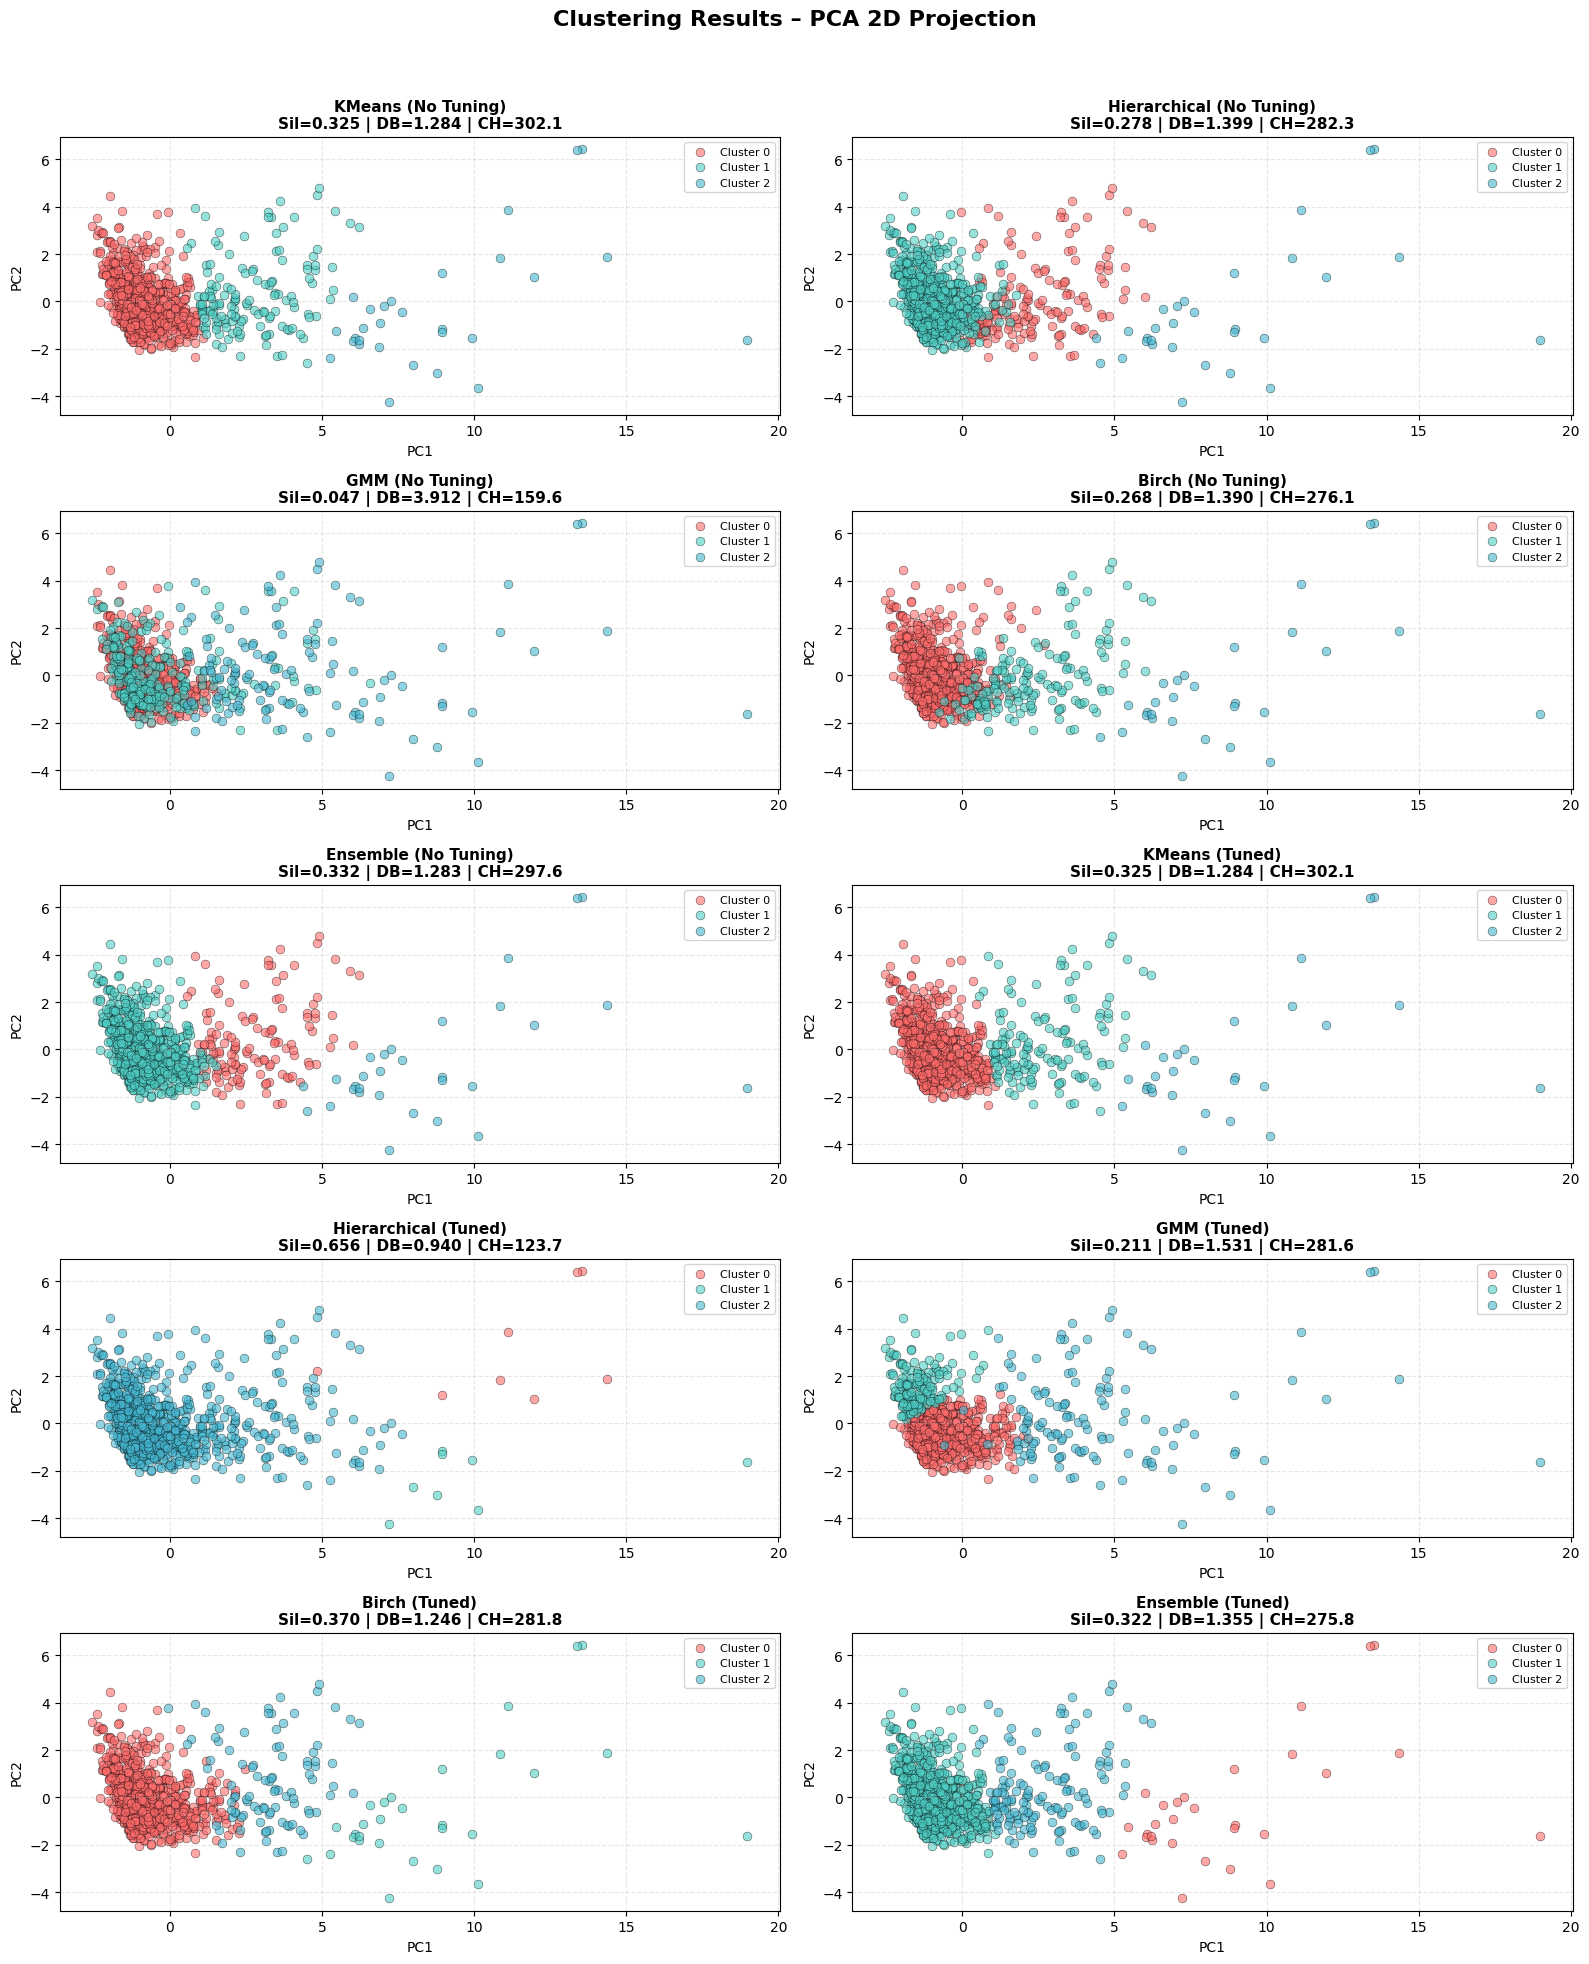


✅ 2D PCA scatter plots generated successfully


In [ ]:
# ========================================
# VISUALIZATION: SCATTER PLOTS (2D PCA)
# SAFE VERSION — NO KeyError
# ========================================

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("\n" + "="*70)
print("GENERATING 2D SCATTER PLOTS (SAFE)")
print("="*70)

# ------------------------------------------------------------
# PCA 2D
# ------------------------------------------------------------
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"\n✓ PCA (2D) applied")
print(f"  Explained variance: {pca_2d.explained_variance_ratio_.sum():.2%}")

# ------------------------------------------------------------
# All possible models (conceptual)
# ------------------------------------------------------------
models_to_plot = [
    ('KMeans_Base', 'KMeans (No Tuning)'),
    ('Hierarchical_Base', 'Hierarchical (No Tuning)'),
    ('GMM_Base', 'GMM (No Tuning)'),
    ('Birch_Base', 'Birch (No Tuning)'),
    ('Ensemble_Base', 'Ensemble (No Tuning)'),
    ('KMeans_Tuned', 'KMeans (Tuned)'),
    ('Hierarchical_Tuned', 'Hierarchical (Tuned)'),
    ('GMM_Tuned', 'GMM (Tuned)'),
    ('Birch_Tuned', 'Birch (Tuned)'),
    ('Ensemble_Tuned', 'Ensemble (Tuned)')
]

# ------------------------------------------------------------
# Only plot models that ACTUALLY exist
# ------------------------------------------------------------
available_models = [(c, t) for c, t in models_to_plot if c in df_model.columns]

if len(available_models) == 0:
    raise ValueError("❌ No clustering results found in df_model. Run Stage 4/5 first.")

print(f"✓ Models available for plotting: {len(available_models)}")

# ------------------------------------------------------------
# Plot layout (dynamic)
# ------------------------------------------------------------
rows = (len(available_models) + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 4))
axes = axes.flatten()

fig.suptitle(
    'Clustering Results – PCA 2D Projection',
    fontsize=16,
    fontweight='bold'
)

# Color palette
colors = [
    '#FF6B6B', '#4ECDC4', '#45B7D1',
    '#FFA07A', '#98D8C8', '#F7DC6F'
]

# ------------------------------------------------------------
# Plot each available model
# ------------------------------------------------------------
for idx, (col_name, title) in enumerate(available_models):
    ax = axes[idx]
    labels = df_model[col_name]

    sil = silhouette_score(X_scaled, labels)
    db  = davies_bouldin_score(X_scaled, labels)
    ch  = calinski_harabasz_score(X_scaled, labels)

    for cluster in sorted(labels.unique()):
        mask = labels == cluster
        ax.scatter(
            X_pca_2d[mask, 0],
            X_pca_2d[mask, 1],
            c=colors[cluster % len(colors)],
            label=f'Cluster {cluster}',
            alpha=0.6,
            s=40,
            edgecolors='black',
            linewidth=0.4
        )

    ax.set_title(
        f'{title}\nSil={sil:.3f} | DB={db:.3f} | CH={ch:.1f}',
        fontsize=11,
        fontweight='bold'
    )
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3, linestyle='--')

# ------------------------------------------------------------
# Hide empty subplots
# ------------------------------------------------------------
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\n✅ 2D PCA scatter plots generated successfully")



GENERATING 3D SCATTER PLOTS (SAFE)

✓ PCA (3D) applied
  Explained variance: 70.28%
✓ Models available for plotting: 10


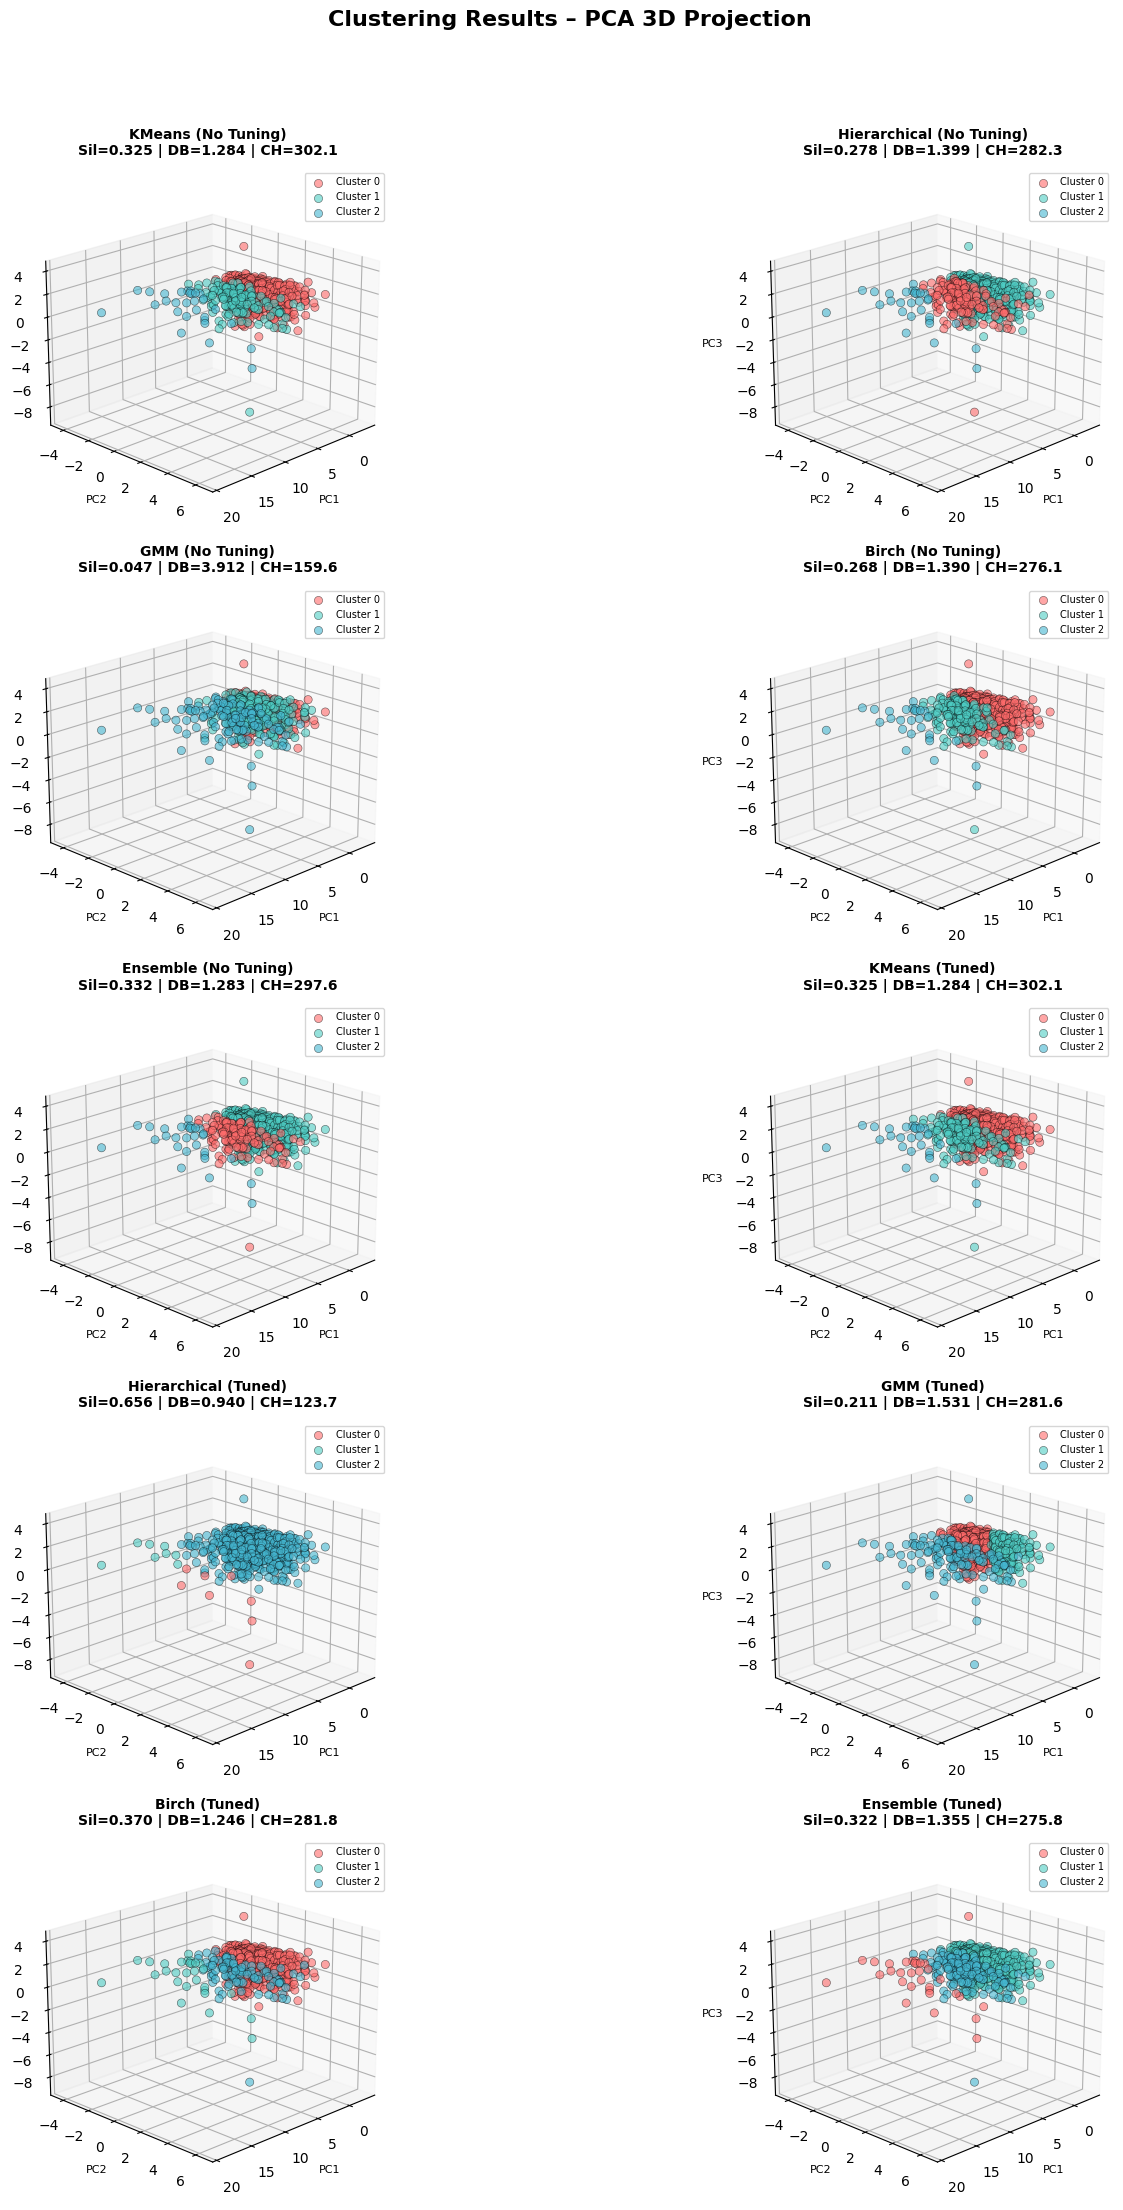


✅ 3D PCA scatter plots generated successfully


In [ ]:
# ========================================
# VISUALIZATION: 3D SCATTER PLOTS (PCA)
# SAFE VERSION — NO KeyError
# ========================================

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("\n" + "="*70)
print("GENERATING 3D SCATTER PLOTS (SAFE)")
print("="*70)

# ------------------------------------------------------------
# PCA 3D
# ------------------------------------------------------------
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"\n✓ PCA (3D) applied")
print(f"  Explained variance: {pca_3d.explained_variance_ratio_.sum():.2%}")

# ------------------------------------------------------------
# All conceptual models
# ------------------------------------------------------------
models_to_plot = [
    ('KMeans_Base', 'KMeans (No Tuning)'),
    ('Hierarchical_Base', 'Hierarchical (No Tuning)'),
    ('GMM_Base', 'GMM (No Tuning)'),
    ('Birch_Base', 'Birch (No Tuning)'),
    ('Ensemble_Base', 'Ensemble (No Tuning)'),
    ('KMeans_Tuned', 'KMeans (Tuned)'),
    ('Hierarchical_Tuned', 'Hierarchical (Tuned)'),
    ('GMM_Tuned', 'GMM (Tuned)'),
    ('Birch_Tuned', 'Birch (Tuned)'),
    ('Ensemble_Tuned', 'Ensemble (Tuned)')
]

# ------------------------------------------------------------
# Filter only existing models
# ------------------------------------------------------------
available_models = [(c, t) for c, t in models_to_plot if c in df_model.columns]

if len(available_models) == 0:
    raise ValueError("❌ No clustering results found in df_model. Run Stage 4/5 first.")

print(f"✓ Models available for plotting: {len(available_models)}")

# ------------------------------------------------------------
# Plot layout (dynamic grid)
# ------------------------------------------------------------
rows = (len(available_models) + 1) // 2
fig = plt.figure(figsize=(18, rows * 4.5))
fig.suptitle(
    'Clustering Results – PCA 3D Projection',
    fontsize=16,
    fontweight='bold',
    y=0.98
)

# Color palette
colors = [
    '#FF6B6B', '#4ECDC4', '#45B7D1',
    '#FFA07A', '#98D8C8', '#F7DC6F'
]

# ------------------------------------------------------------
# Plot each available model
# ------------------------------------------------------------
for idx, (col_name, title) in enumerate(available_models):
    ax = fig.add_subplot(rows, 2, idx + 1, projection='3d')
    labels = df_model[col_name]

    sil = silhouette_score(X_scaled, labels)
    db  = davies_bouldin_score(X_scaled, labels)
    ch  = calinski_harabasz_score(X_scaled, labels)

    for cluster in sorted(labels.unique()):
        mask = labels == cluster
        ax.scatter(
            X_pca_3d[mask, 0],
            X_pca_3d[mask, 1],
            X_pca_3d[mask, 2],
            c=colors[cluster % len(colors)],
            label=f'Cluster {cluster}',
            alpha=0.6,
            s=35,
            edgecolors='black',
            linewidth=0.4
        )

    ax.set_title(
        f'{title}\nSil={sil:.3f} | DB={db:.3f} | CH={ch:.1f}',
        fontsize=10,
        fontweight='bold',
        pad=10
    )
    ax.set_xlabel('PC1', fontsize=8)
    ax.set_ylabel('PC2', fontsize=8)
    ax.set_zlabel('PC3', fontsize=8)
    ax.legend(fontsize=7)
    ax.grid(alpha=0.3)

    # Viewing angle
    ax.view_init(elev=20, azim=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

print("\n✅ 3D PCA scatter plots generated successfully")



BEST MODEL 3D DETAILED VISUALIZATION


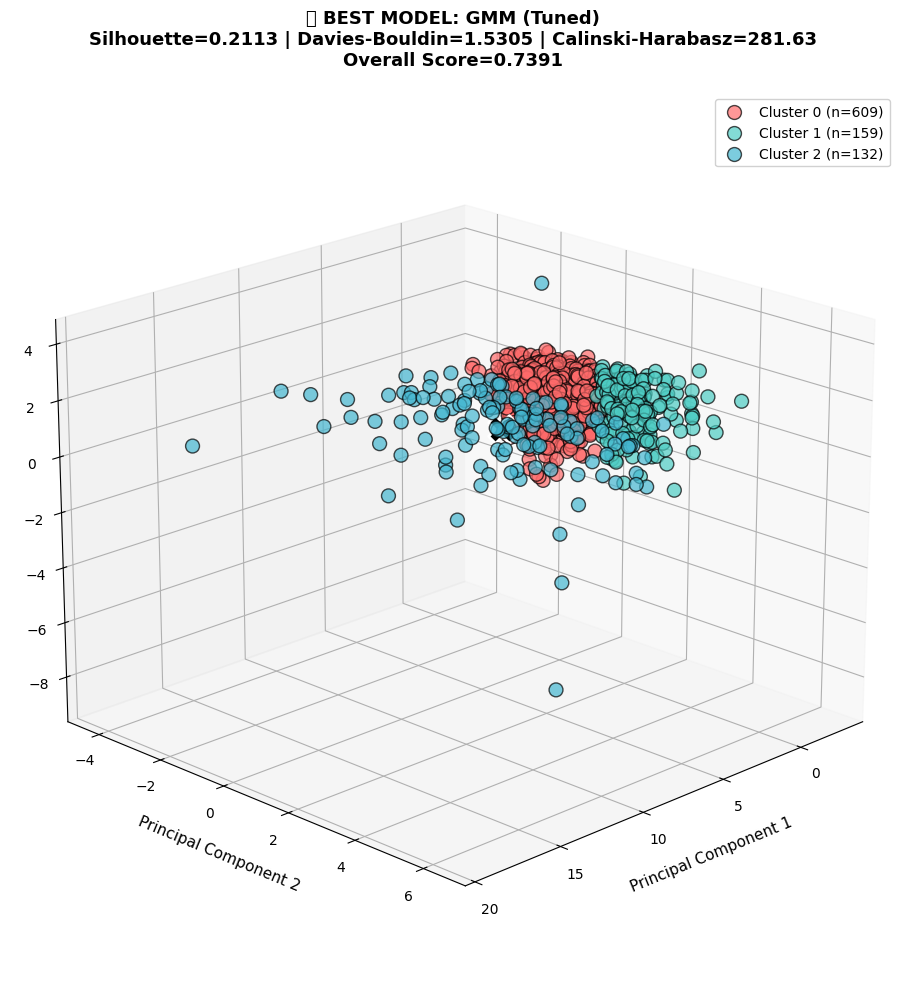


✓ Best model (GMM (Tuned)) 3D visualization complete!


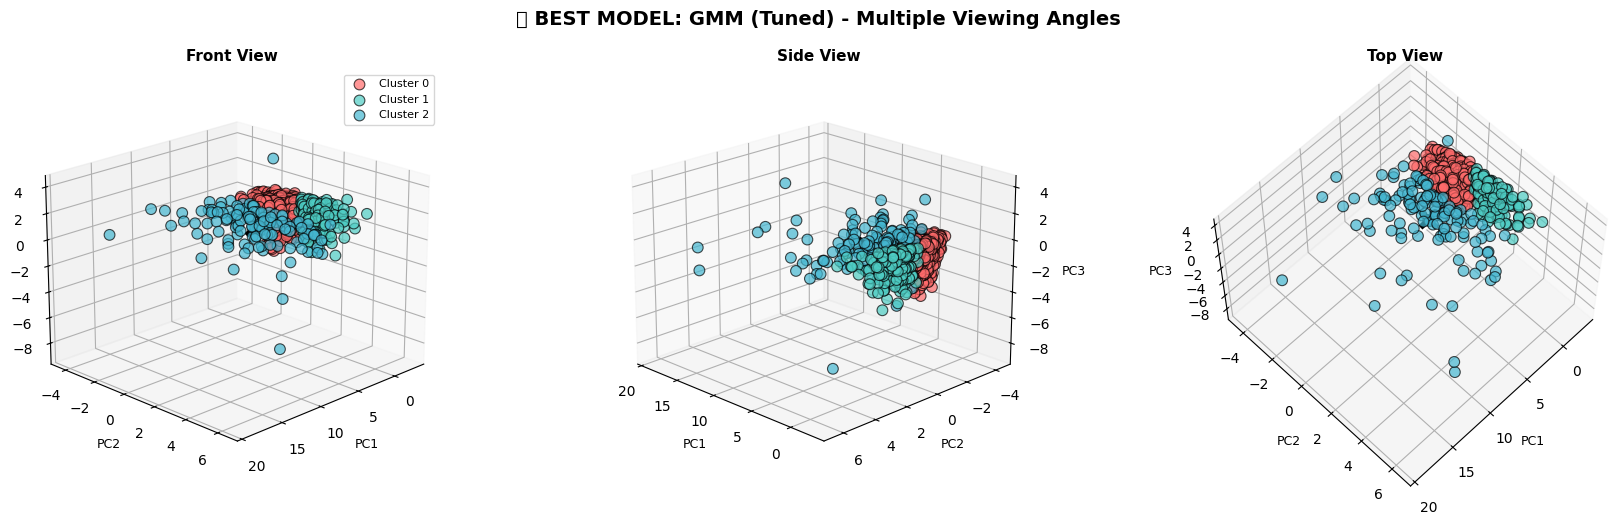

✓ Multiple viewing angles visualization complete!

ALL VISUALIZATIONS COMPLETE (2D + 3D)


In [ ]:
# ========================================
# BEST MODEL VISUALIZATION (3D - INTERACTIVE)
# ========================================

print("\n" + "="*70)
print("BEST MODEL 3D DETAILED VISUALIZATION")
print("="*70)

best_model_name = overall_best['Model']
best_model_col = None

# Find column name for best model
for col_name, title in models_to_plot:
    if title == best_model_name:
        best_model_col = col_name
        break

if best_model_col:
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    labels_best = df_model[best_model_col]

    # Get metrics
    sil = silhouette_score(X_scaled, labels_best)
    db = davies_bouldin_score(X_scaled, labels_best)
    ch = calinski_harabasz_score(X_scaled, labels_best)

    # Plot 3D scatter
    for cluster in sorted(labels_best.unique()):
        mask = labels_best == cluster
        ax.scatter(
            X_pca_3d[mask, 0],
            X_pca_3d[mask, 1],
            X_pca_3d[mask, 2],
            c=colors[cluster % len(colors)],
            label=f'Cluster {cluster} (n={mask.sum()})',
            alpha=0.7,
            s=100,
            edgecolors='black',
            linewidth=1
        )

        # Calculate and plot cluster centers
        center = X_pca_3d[mask].mean(axis=0)
        ax.scatter(center[0], center[1], center[2],
                  c='black',
                  marker='X',
                  s=400,
                  edgecolors='white',
                  linewidth=2,
                  zorder=10)

    ax.set_title(f'🏆 BEST MODEL: {best_model_name}\n' +
                 f'Silhouette={sil:.4f} | Davies-Bouldin={db:.4f} | Calinski-Harabasz={ch:.2f}\n' +
                 f'Overall Score={overall_best["Overall_Score"]:.4f}',
                 fontsize=13, fontweight='bold', pad=20)
    ax.set_xlabel('Principal Component 1', fontsize=11, labelpad=10)
    ax.set_ylabel('Principal Component 2', fontsize=11, labelpad=10)
    ax.set_zlabel('Principal Component 3', fontsize=11, labelpad=10)
    ax.legend(loc='best', fontsize=10, framealpha=0.9)
    ax.grid(alpha=0.3)

    # Multiple viewing angles
    ax.view_init(elev=20, azim=45)

    plt.tight_layout()
    plt.show()

    print(f"\n✓ Best model ({best_model_name}) 3D visualization complete!")

    # Create additional views with different angles
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), subplot_kw={'projection': '3d'})
    fig.suptitle(f'🏆 BEST MODEL: {best_model_name} - Multiple Viewing Angles', fontsize=14, fontweight='bold')

    angles = [(20, 45), (20, 135), (60, 45)]
    titles = ['Front View', 'Side View', 'Top View']

    for idx, (ax, angle, view_title) in enumerate(zip(axes, angles, titles)):
        for cluster in sorted(labels_best.unique()):
            mask = labels_best == cluster
            ax.scatter(
                X_pca_3d[mask, 0],
                X_pca_3d[mask, 1],
                X_pca_3d[mask, 2],
                c=colors[cluster % len(colors)],
                label=f'Cluster {cluster}',
                alpha=0.7,
                s=60,
                edgecolors='black',
                linewidth=0.8
            )

            # Cluster centers
            center = X_pca_3d[mask].mean(axis=0)
            ax.scatter(center[0], center[1], center[2],
                      c='black', marker='X', s=300,
                      edgecolors='white', linewidth=2, zorder=10)

        ax.set_title(view_title, fontsize=11, fontweight='bold')
        ax.set_xlabel('PC1', fontsize=9)
        ax.set_ylabel('PC2', fontsize=9)
        ax.set_zlabel('PC3', fontsize=9)
        ax.view_init(elev=angle[0], azim=angle[1])
        ax.grid(alpha=0.3)
        if idx == 0:
            ax.legend(loc='best', fontsize=8)

    plt.tight_layout()
    plt.show()

    print(f"✓ Multiple viewing angles visualization complete!")

else:
    print("\n⚠️ Could not find best model column")

print("\n" + "="*70)
print("ALL VISUALIZATIONS COMPLETE (2D + 3D)")
print("="*70)

In [ ]:
# ========================================
# STEP 1: PREPARE PROXY DATASET
# ========================================

print("\n[STEP 1] Preparing Proxy Dataset")
print("-" * 70)

# Gunakan model terbaik sebagai Y_Proxy
best_model_col = None
for col_name, title in models_to_plot:
    if title == overall_best['Model']:
        best_model_col = col_name
        break

if best_model_col is None:
    print("⚠️ Best model not found, using KMeans_Tuned as default")
    best_model_col = 'KMeans_Tuned'

# X_Proxy = All features (before clustering)
X_proxy = X_combined.copy()

# Y_Proxy = Cluster labels from best model
y_proxy = df_model[best_model_col].copy()

print(f"✓ Using cluster labels from: {best_model_col}")
print(f"✓ X_Proxy shape: {X_proxy.shape}")
print(f"✓ Y_Proxy shape: {y_proxy.shape}")
print(f"✓ Cluster distribution:\n{y_proxy.value_counts().sort_index()}")

# Feature names
feature_names = X_proxy.columns.tolist()
print(f"\n✓ Total features: {len(feature_names)}")


[STEP 1] Preparing Proxy Dataset
----------------------------------------------------------------------
✓ Using cluster labels from: GMM_Tuned
✓ X_Proxy shape: (900, 16)
✓ Y_Proxy shape: (900,)
✓ Cluster distribution:
GMM_Tuned
0    609
1    159
2    132
Name: count, dtype: int64

✓ Total features: 16


In [ ]:
# ========================================
# STEP 2: TRAIN-TEST SPLIT
# ========================================

print("\n[STEP 2] Train-Test Split")
print("-" * 70)

X_train, X_test, y_train, y_test = train_test_split(
    X_proxy, y_proxy,
    test_size=0.2,
    random_state=42,
    stratify=y_proxy
)

print(f"✓ Train set: {X_train.shape[0]} samples")
print(f"✓ Test set: {X_test.shape[0]} samples")
print(f"\n✓ Train distribution:\n{y_train.value_counts().sort_index()}")
print(f"\n✓ Test distribution:\n{y_test.value_counts().sort_index()}")



[STEP 2] Train-Test Split
----------------------------------------------------------------------
✓ Train set: 720 samples
✓ Test set: 180 samples

✓ Train distribution:
GMM_Tuned
0    487
1    127
2    106
Name: count, dtype: int64

✓ Test distribution:
GMM_Tuned
0    122
1     32
2     26
Name: count, dtype: int64



[STEP 3] Training Random Forest Classifier
----------------------------------------------------------------------
✓ Random Forest trained successfully

📊 Model Performance:
   Train Accuracy: 0.9931
   Test Accuracy: 0.9389

📊 5-Fold Cross-Validation:
   Mean CV Accuracy: 0.9556 (+/- 0.0145)

📋 Classification Report (Test Set):
              precision    recall  f1-score   support

   Cluster 0       0.95      0.98      0.96       122
   Cluster 1       0.90      0.84      0.87        32
   Cluster 2       0.92      0.88      0.90        26

    accuracy                           0.94       180
   macro avg       0.92      0.90      0.91       180
weighted avg       0.94      0.94      0.94       180



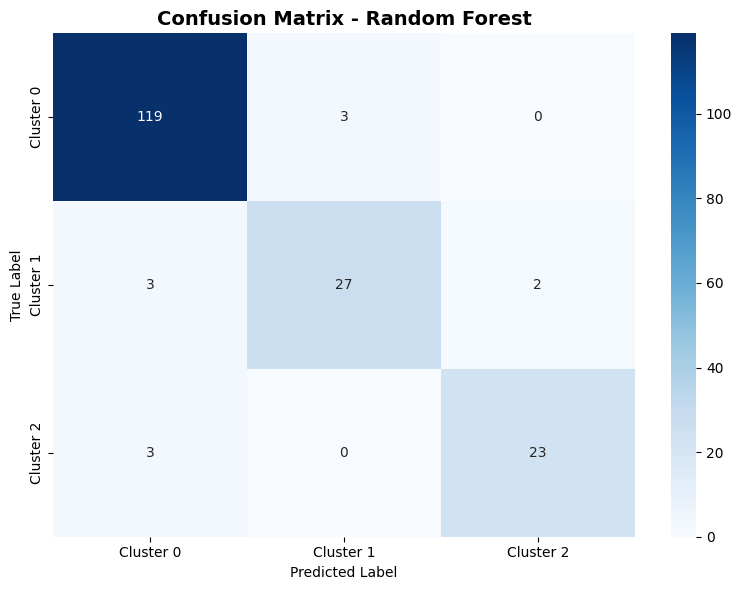


✓ Confusion matrix plotted


In [ ]:
# ========================================
# STEP 3: RANDOM FOREST CLASSIFIER
# ========================================

print("\n[STEP 3] Training Random Forest Classifier")
print("-" * 70)

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

print("✓ Random Forest trained successfully")

# Predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print(f"\n📊 Model Performance:")
print(f"   Train Accuracy: {train_acc:.4f}")
print(f"   Test Accuracy: {test_acc:.4f}")

# Cross-validation
cv_scores = cross_val_score(rf_model, X_proxy, y_proxy, cv=5, scoring='accuracy')
print(f"\n📊 5-Fold Cross-Validation:")
print(f"   Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Classification Report
print("\n📋 Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test, target_names=[f'Cluster {i}' for i in sorted(y_proxy.unique())]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in sorted(y_proxy.unique())],
            yticklabels=[f'Cluster {i}' for i in sorted(y_proxy.unique())])
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\n✓ Confusion matrix plotted")


[STEP 4] Feature Importance Analysis
----------------------------------------------------------------------

📊 Top 10 Important Features:
            Feature  Importance
 TrainingEfficiency    0.260719
  TrainingIntensity    0.209136
PerformanceVelocity    0.202860
 YearsAtCompany_log    0.142674
  TrainingHours_log    0.122993
  MonthlyIncome_log    0.018612
       PotentialGap    0.018201
                Age    0.008968
    CompetencyScore    0.004308
    JobSatisfaction    0.003426


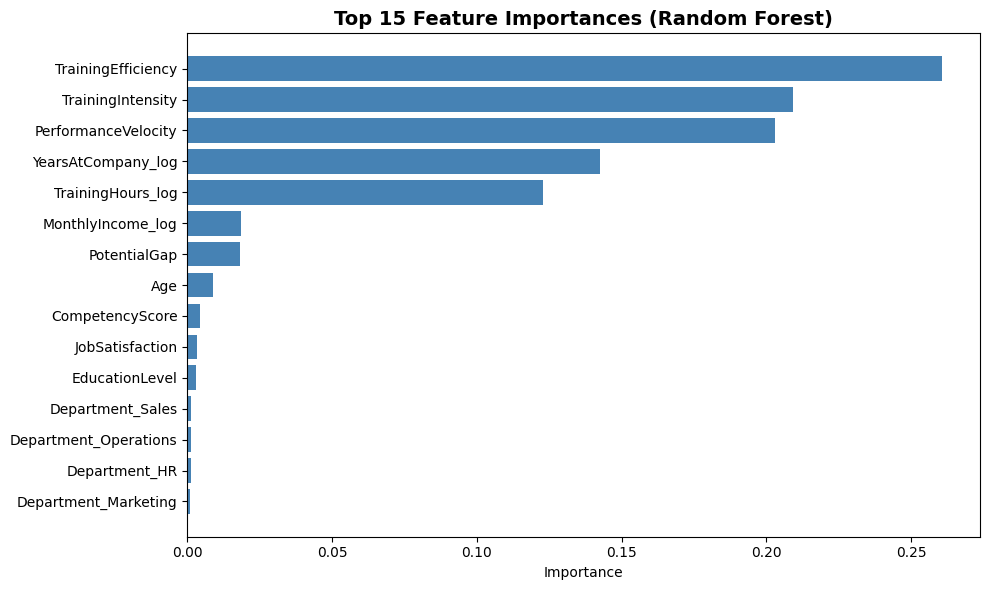


✓ Feature importance plotted


In [ ]:
# ========================================
# STEP 4: FEATURE IMPORTANCE (BASELINE)
# ========================================

print("\n[STEP 4] Feature Importance Analysis")
print("-" * 70)

# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n📊 Top 10 Important Features:")
print(feature_importance.head(10).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Top 15 Feature Importances (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n✓ Feature importance plotted")


[STEP 5] SHAP Analysis - Global Interpretation
----------------------------------------------------------------------
✓ SHAP values calculated for 180 samples

📊 Generating SHAP Summary Plot (Global)...


<Figure size 1000x800 with 0 Axes>

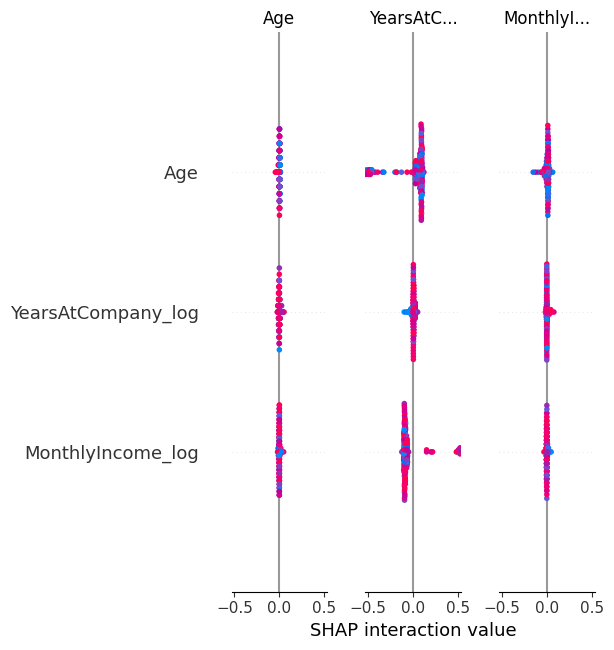

✓ SHAP summary plot generated

📊 Generating SHAP Bar Plot...


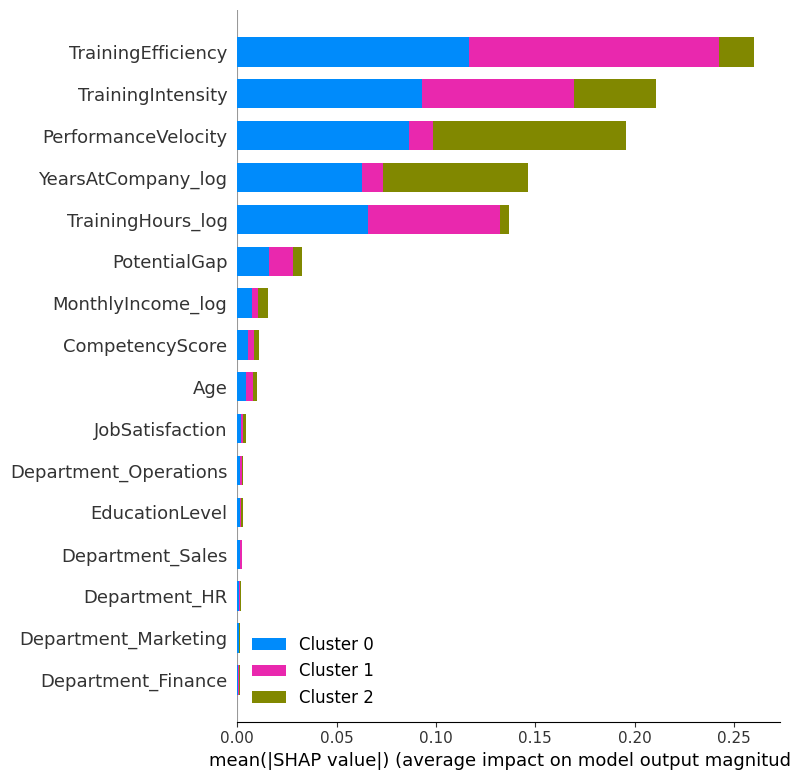

✓ SHAP bar plot generated


In [ ]:
# ========================================
# STEP 5: SHAP ANALYSIS (GLOBAL)
# ========================================

import shap
shap.initjs()

print("\n[STEP 5] SHAP Analysis - Global Interpretation")
print("-" * 70)

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Sample test data for speed
shap_sample_size = min(500, len(X_test))
X_test_sample = X_test.sample(n=shap_sample_size, random_state=42)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_sample)

print(f"✓ SHAP values calculated for {shap_sample_size} samples")

# SHAP Summary Plot (Global)
print("\n📊 Generating SHAP Summary Plot (Global)...")
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_values,
    X_test_sample,
    feature_names=feature_names,
    class_names=[f'Cluster {i}' for i in sorted(y_proxy.unique())],
    show=False
)
plt.tight_layout()
plt.show()

print("✓ SHAP summary plot generated")

# SHAP Bar Plot (Global Feature Importance)
print("\n📊 Generating SHAP Bar Plot...")
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values,
    X_test_sample,
    feature_names=feature_names,
    plot_type="bar",
    class_names=[f'Cluster {i}' for i in sorted(y_proxy.unique())],
    show=False
)
plt.tight_layout()
plt.show()

print("✓ SHAP bar plot generated")



[STEP 6] SHAP Analysis - Per Cluster Interpretation
----------------------------------------------------------------------

--- Cluster 0 ---


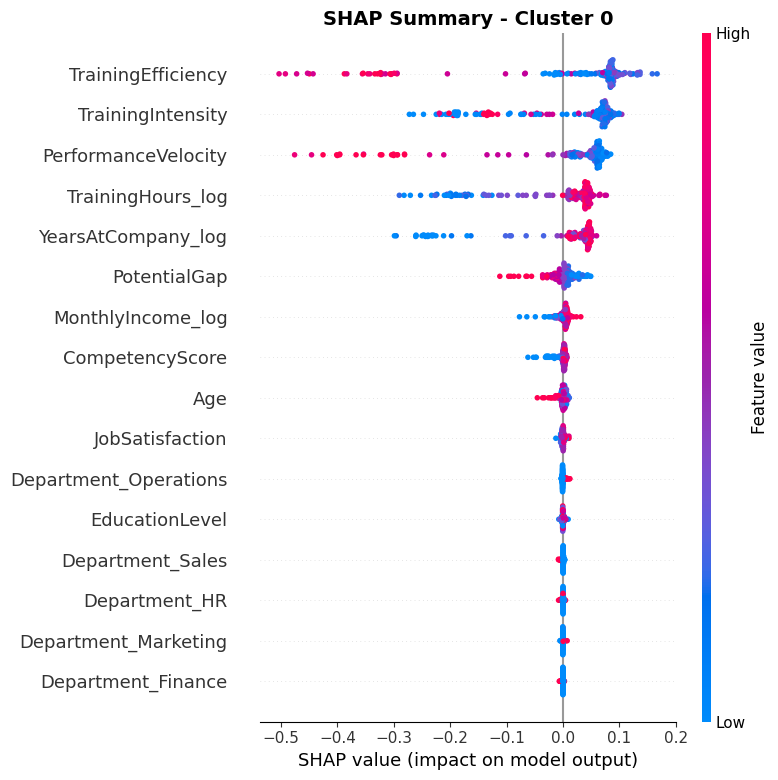

✓ SHAP summary for Cluster 0 generated

--- Cluster 1 ---


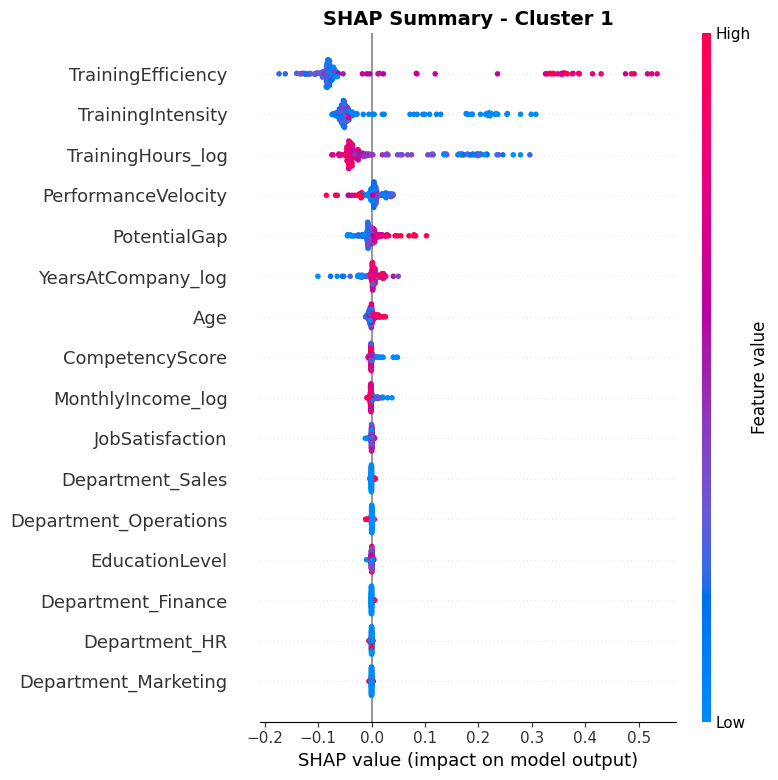

✓ SHAP summary for Cluster 1 generated

--- Cluster 2 ---


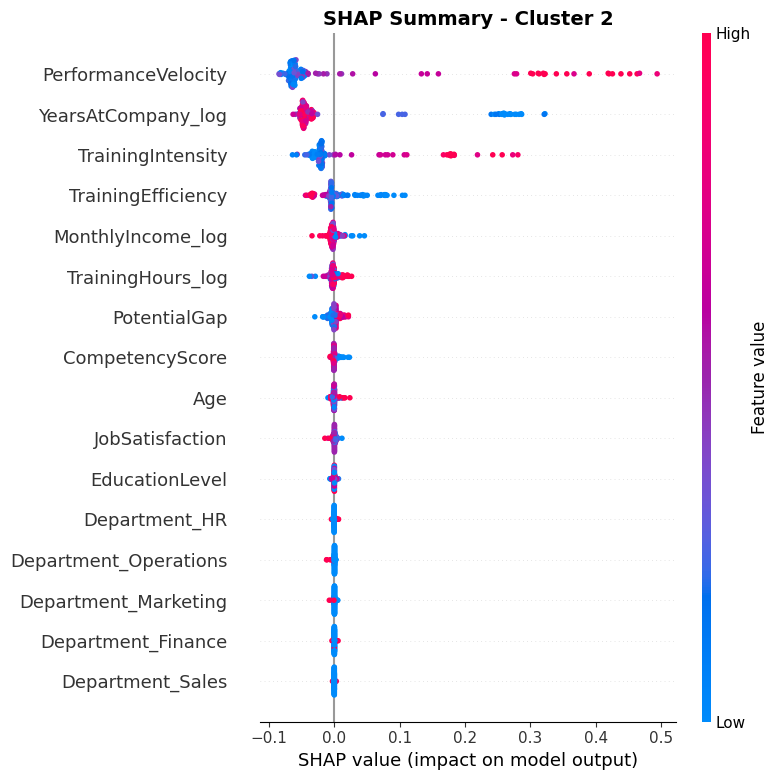

✓ SHAP summary for Cluster 2 generated

✓ All per-cluster SHAP plots generated


In [ ]:
# ========================================
# STEP 6: SHAP ANALYSIS PER CLUSTER
# ========================================

print("\n[STEP 6] SHAP Analysis - Per Cluster Interpretation")
print("-" * 70)

n_clusters = len(sorted(y_proxy.unique()))

for cluster_idx in range(n_clusters):
    print(f"\n--- Cluster {cluster_idx} ---")

    # SHAP values for specific cluster
    if isinstance(shap_values, list):
        shap_cluster = shap_values[cluster_idx]
    else:
        shap_cluster = shap_values[:, :, cluster_idx]

    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_cluster, X_test_sample, feature_names=feature_names, show=False)
    plt.title(f'SHAP Summary - Cluster {cluster_idx}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print(f"✓ SHAP summary for Cluster {cluster_idx} generated")

print("\n✓ All per-cluster SHAP plots generated")



[STEP 7] LIME Analysis - Single Instance Interpretation
----------------------------------------------------------------------

📊 Generating LIME explanations for sample instances...

--- LIME Explanation for Cluster 0 (Test Position: 0) ---


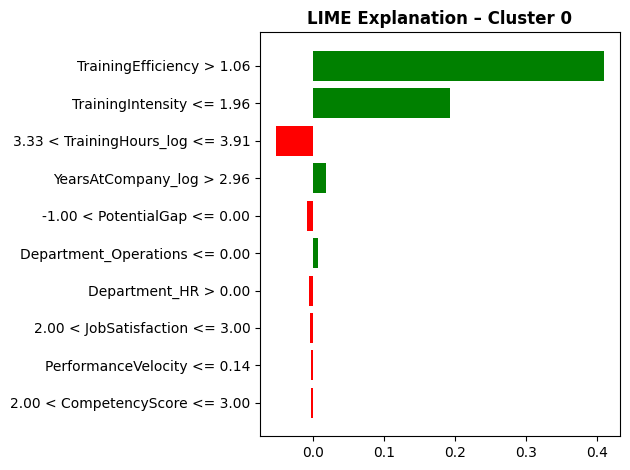

✓ LIME explanation for Cluster 0 generated

--- LIME Explanation for Cluster 1 (Test Position: 3) ---


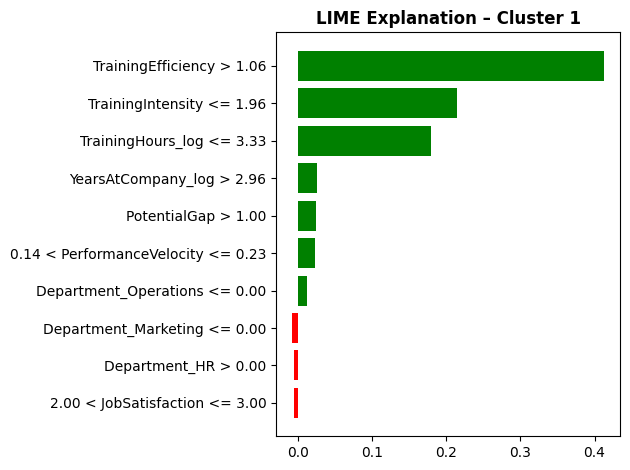

✓ LIME explanation for Cluster 1 generated

--- LIME Explanation for Cluster 2 (Test Position: 11) ---


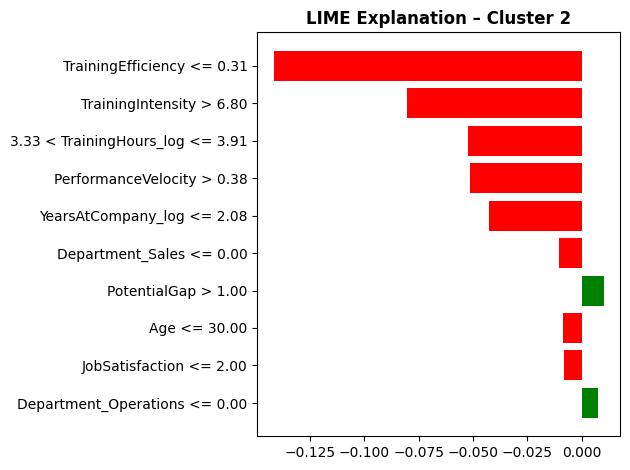

✓ LIME explanation for Cluster 2 generated

✅ All LIME explanations generated successfully


In [ ]:
# ========================================
# STEP 7: LIME ANALYSIS (SINGLE INSTANCE)
# FINAL SAFE VERSION — NO INDEX ALIGNMENT ISSUES
# ========================================

import matplotlib.pyplot as plt
from lime import lime_tabular
import numpy as np
import pandas as pd

print("\n[STEP 7] LIME Analysis - Single Instance Interpretation")
print("-" * 70)

# ------------------------------------------------------------
# RESET INDEX (CRITICAL FIX)
# ------------------------------------------------------------
X_test_lime = X_test.reset_index(drop=True)
y_test_lime = pd.Series(y_test).reset_index(drop=True)

# ------------------------------------------------------------
# Create LIME explainer
# ------------------------------------------------------------
lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=feature_names,
    class_names=[f'Cluster {i}' for i in sorted(np.unique(y_test_lime))],
    mode='classification',
    random_state=42
)

print("\n📊 Generating LIME explanations for sample instances...\n")

# ------------------------------------------------------------
# LIME per cluster (POSITIONAL, SAFE)
# ------------------------------------------------------------
for cluster_idx in sorted(np.unique(y_test_lime)):

    # Positional selection (NO index dependency)
    cluster_positions = np.where(y_test_lime.values == cluster_idx)[0]

    if len(cluster_positions) == 0:
        print(f"⚠️ No samples in Cluster {cluster_idx} in test set")
        continue

    pos = cluster_positions[0]   # take first instance
    instance = X_test_lime.iloc[pos].values

    # Generate LIME explanation
    lime_exp = lime_explainer.explain_instance(
        data_row=instance,
        predict_fn=rf_model.predict_proba,
        num_features=10
    )

    print(f"--- LIME Explanation for Cluster {cluster_idx} (Test Position: {pos}) ---")

    fig = lime_exp.as_pyplot_figure()
    plt.title(
        f'LIME Explanation – Cluster {cluster_idx}',
        fontsize=12,
        fontweight='bold'
    )
    plt.tight_layout()
    plt.show()

    print(f"✓ LIME explanation for Cluster {cluster_idx} generated\n")

print("✅ All LIME explanations generated successfully")


In [ ]:
# ========================================
# STEP 8: SAVE MODEL (OPTIONAL)
# ========================================

print("\n[STEP 8] Model Summary")
print("-" * 70)

print(f"\n🎯 Final Model Summary:")
print(f"   Model: Random Forest Classifier")
print(f"   Best Clustering Method: {best_model_col}")
print(f"   Number of Clusters: {n_clusters}")
print(f"   Test Accuracy: {test_acc:.4f}")
print(f"   CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
print(f"\n✓ Top 3 Important Features:")
for idx, row in feature_importance.head(3).iterrows():
    print(f"   {idx+1}. {row['Feature']}: {row['Importance']:.4f}")

print("\n" + "="*70)
print("SUPERVISED PROXY CLASSIFICATION COMPLETE")
print("="*70)
print("\n✅ All steps completed successfully!")
print("✅ Model ready for deployment or further analysis")


[STEP 8] Model Summary
----------------------------------------------------------------------

🎯 Final Model Summary:
   Model: Random Forest Classifier
   Best Clustering Method: GMM_Tuned
   Number of Clusters: 3
   Test Accuracy: 0.9389
   CV Accuracy: 0.9556 (+/- 0.0145)

✓ Top 3 Important Features:
   9. TrainingEfficiency: 0.2607
   7. TrainingIntensity: 0.2091
   10. PerformanceVelocity: 0.2029

SUPERVISED PROXY CLASSIFICATION COMPLETE

✅ All steps completed successfully!
✅ Model ready for deployment or further analysis
